In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-25 10:40:33.758813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
8291  -0.012150 -0.032903  266.100000  2491.995719  1031.113303  1032.385986   
3812   0.009946 -0.040725  325.699998  2486.762542  1002.355768  1003.579007   
2220  -0.098607 -0.048255  292.959996  2465.628629  1012.968245  1014.174503   
4495   0.547509  0.022966  337.584998  2482.259844   993.137445   994.339005   
1173   0.085739  0.094400  357.980002  2471.653475  1017.458491  1018.669986   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  272.535001  2491.064483  1016.776770  1018.032996   
9509   0.065996 -0.026629  273.849998  2476.814342  1011.035600  1012.250504   
2283   0.016743 -0.032014  288.435002  2467.407841  1014.254360  1015.478500   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
8799  -0.012150 -0.032903  331.705000  2484.796885  1011.504464  1012.736490   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
8291   4.375262  4.390499  93.076403  93.066660  ...            53.500000   
3812   5.421004  5.432089  90.952000  90.829780  ...           105.349998   
2220   5.485714  5.685436  62.488897  60.825029  ...            56.160000   
4495   6.040936  6.061799  86.591240  86.278805  ...            73.409996   
1173   8.439131  8.454612  95.247900  95.275105  ...            54.480000   
...         ...       ...        ...        ...  ...                  ...   
7832   3.411718  3.462474  73.038053  72.278851  ...            49.070000   
9509   6.481914  6.540536  83.244302  82.543787  ...            55.559998   
2283   3.801912  4.031039  56.148297  53.812369  ...           -24.299999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
8799   4.436205  4.520474  72.850603  71.568573  ...           -12.940000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
8291            99.329994          145.099991            52.219997   
3812            60.669998           15.929999            51.360001   
2220           101.400002          146.589996            37.619999   
4495           117.959999          162.399994            59.059998   
1173           100.189995          145.770004            48.719997   
...                   ...                 ...                  ...   
7832            95.549995          141.940002            63.939999   
9509           101.309998          146.940002            46.489998   
2283           -69.070000         -113.919998            61.529999   
10196           60.469997           15.740000            52.669998   
8799           -57.509998         -102.110001            58.449997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
8291            41.040001           52.239998    20210402T110300Z   
3812            40.430000           51.329998    20170612T204500Z   
2220            28.219999           37.610001    20171118T141200Z   
4495            47.939999           58.859997    20160129T130900Z   
1173            37.790001           48.719997    20160916T174500Z   
...                   ...                 ...                 ...   
7832            52.369999           63.719997    20210118T120300Z   
9509            35.770000           46.469997    20190816T122700Z   
2283            50.469997           61.609997    20171207T151500Z   
10196           41.669998           52.629997    20200121T200600Z   
8799            47.399998           58.489998    20210618T140600Z   

             stop_sensing_time       u10        v10  
8291   20210402T124458.125000Z  6.045154   7.037160  
3812   20170612T222658.125000Z -6.122303  -9.317768  
2220   20171118T155058.125000Z  5.725120   4.448625  
4495   20160129T144758.125000Z  5.358885 -13.263199  
1173   20160916T192358.125000Z  1.669808  -3.258454  
...                        ...       ...        ...  
7832   20210118T134158.125000Z  6.045154   7.037160  
9509   20190816T140858.12

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

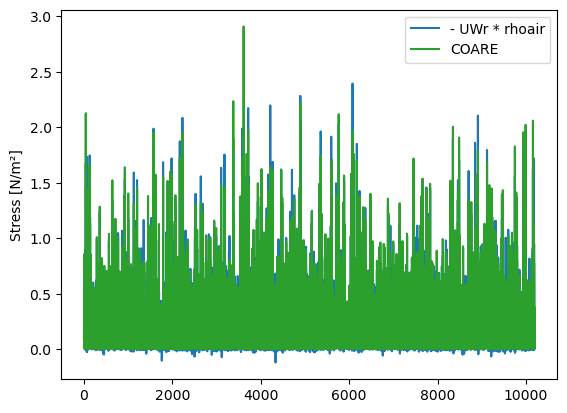

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

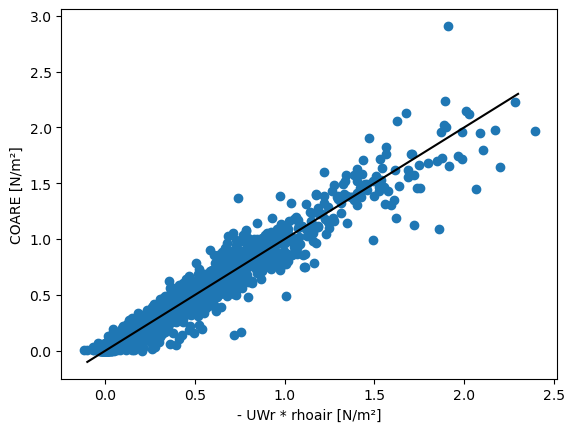

In [ ]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10200, 67)

In [13]:
df.shape[0]*0.8

8160.0

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
8291         -21.329966       -20.314684       -20.953699   
3812         -20.943676       -13.976841       -16.550650   
2220         -13.540611       -10.180238       -18.316372   
4495         -20.408886       -14.060665       -14.675045   
1173         -18.629818       -16.368279       -17.564482   
...                 ...              ...              ...   
7832         -27.140862       -23.478655       -28.449240   
9509         -22.741312       -14.892164       -18.181908   
2283         -22.848459       -16.476969       -19.476072   
10196        -20.899197       -14.651740       -17.077446   
8799         -33.386471       -26.202229       -28.333775   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
8291             53.500000           99.329994          145.099991   
3812            105.349998           60.669998           15.929999   
2220             56.160000          101.400002          146.589996   
4495             73.409996          117.959999          162.399994   
1173             54.480000          100.189995          145.770004   
...                    ...                 ...                 ...   
7832             49.070000           95.549995          141.940002   
9509             55.559998          101.309998          146.940002   
2283            -24.299999          -69.070000         -113.919998   
10196           105.129997           60.469997           15.740000   
8799            -12.940000          -57.509998         -102.110001   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft       u10  \
8291             52.219997           41.040001           52.239998  6.045154   
3812             51.360001           40.430000           51.329998 -6.122303   
2220             37.619999           28.219999           37.610001  5.725120   
4495             59.059998           47.939999           58.859997  5.358885   
1173             48.719997           37.790001           48.719997  1.669808   
...                    ...                 ...                 ...       ...   
7832             63.939999           52.369999           63.719997  6.045154   
9509             46.489998           35.770000           46.469997  4.793102   
2283             61.529999           50.469997           61.609997  9.488249   
10196            52.669998           41.669998           52.629997  4.111861   
8799             58.449997           47.399998           58.489998  6.045154   

             v10  
8291    7.037160  
3812   -9.317768  
2220    4.448625  
4495  -13.263199  
1173   -3.258454  
...          ...  
7832    7.037160  
9509   -5.152116  
2283   -0.378240  
10196   8.730479  
8799    7.037160  

[10200 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

8291     0.142940
3812     0.248008
2220     0.128759
4495     0.448188
1173     0.011088
           ...   
7832     0.026857
9509     0.048700
2283     0.157549
10196    0.061098
8799     0.006362
Length: 10200, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

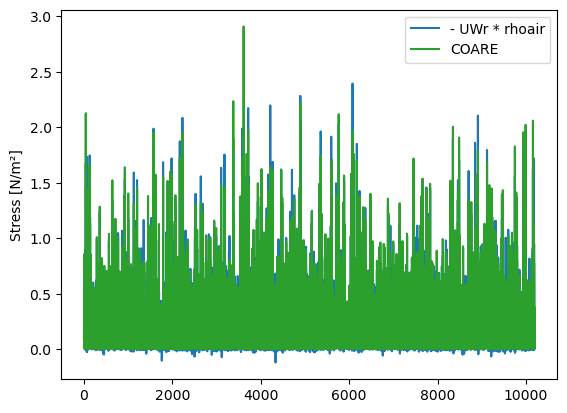

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [23]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [24]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [25]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-05-25 10:42:46.451847: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-25 10:42:46.454252: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-25 10:42:46.454264: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-25 10:42:46.454280: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-05-25 10:42:46.455372: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
179/179 [==============================] - 1s 4ms/step - loss: 939.9136 - mean_absolute_error: 24.1825 - val_loss: 107.7440 - val_mean_absolute_error: 8.6761
Epoch 2/500
179/179 [==============================] - 0s 631us/step - loss: 814.7801 - mean_absolute_error: 8.5934 - val_loss: 33.5246 - val_mean_absolute_error: 4.4767
Epoch 3/500
179/179 [==============================] - 0s 619us/step - loss: 493.4218 - mean_absolute_error: 5.0035 - val_loss: 23.1830 - val_mean_absolute_error: 3.7044
Epoch 4/500
179/179 [==============================] - 0s 607us/step - loss: 306.5592 - mean_absolute_error: 4.3031 - val_loss: 21.9221 - val_mean_absolute_error: 3.6515
Epoch 5/500
179/179 [==============================] - 0s 591us/step - loss: 490.3524 - mean_absolute_error: 4.5030 - val_loss: 15.3862 - val_mean_absolute_error: 2.9492
Epoch 6/500
179/179 [==============================] - 0s 588us/step - loss: 487.0491 - mean_absolute_error: 3.9267 - val_loss: 13.5649 - val_mean_abs

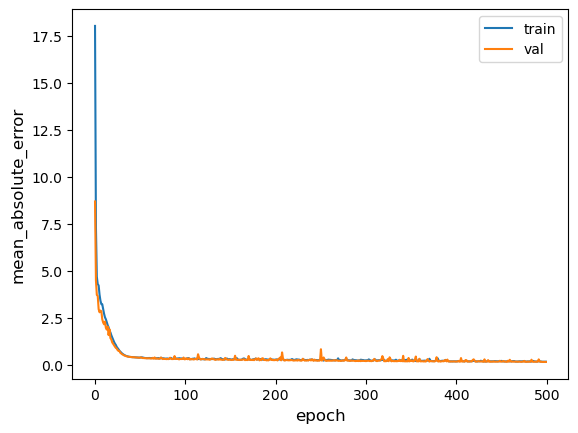

64/64 [==============================] - 0s 370us/step - loss: 0.0514 - mean_absolute_error: 0.1562
Test accuracy 0.15618330240249634
Test loss 0.05139181762933731


In [26]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [27]:
y_test_pred = multi_dense_model.predict(x_test)

In [28]:
np.mean(y_test)

0.17533387401213504

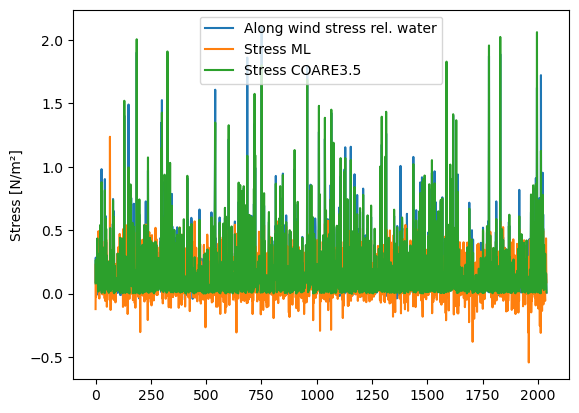

In [29]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

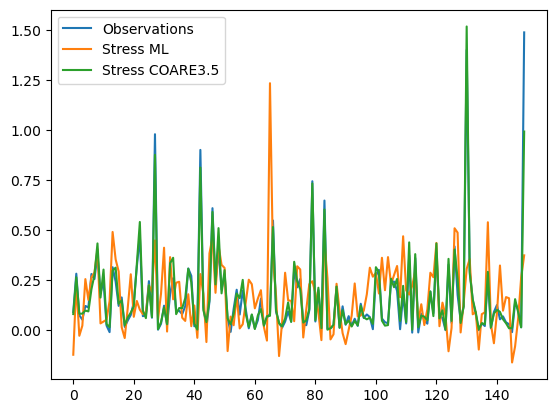

In [36]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

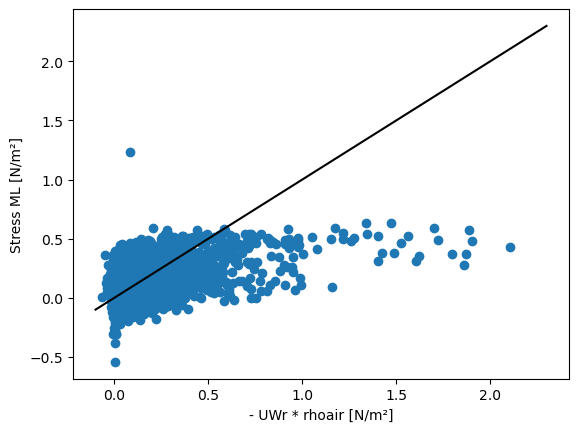

In [30]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

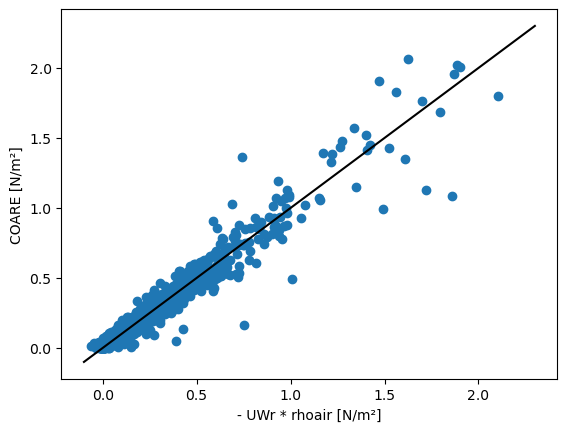

In [31]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [32]:
rmse(y_test.values, y_test_pred)

0.2953484888816626

In [33]:
rmse(y_test.values, c_test)

0.056241578532168816

## Correlation

In [34]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.44700205],
       [0.44700205, 1.        ]])

In [35]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

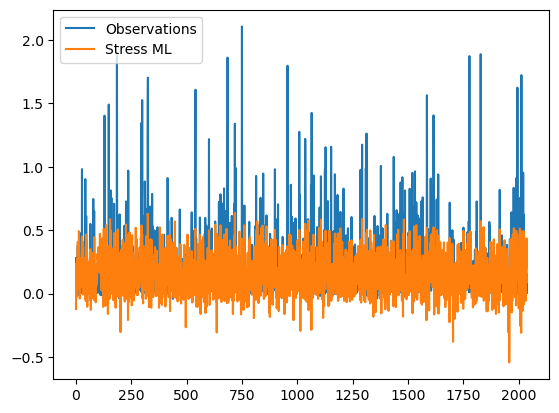

In [37]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.45311389],
       [0.45311389, 1.        ]])

In [38]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [39]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2944815090189082

# Other experiments

In [47]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [48]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [49]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.7016 - mean_absolute_error: 1.1348 - val_loss: 0.1667 - val_mean_absolute_error: 0.3296
Epoch 2/500
179/179 [==============================] - 0s 861us/step - loss: 0.2315 - mean_absolute_error: 0.3687 - val_loss: 0.2204 - val_mean_absolute_error: 0.4022
Epoch 3/500
179/179 [==============================] - 0s 828us/step - loss: 0.0851 - mean_absolute_error: 0.2134 - val_loss: 0.0831 - val_mean_absolute_error: 0.2243
Epoch 4/500
179/179 [==============================] - 0s 837us/step - loss: 0.0770 - mean_absolute_error: 0.1905 - val_loss: 0.0587 - val_mean_absolute_error: 0.1750
Epoch 5/500
179/179 [==============================] - 0s 833us/step - loss: 0.0689 - mean_absolute_error: 0.1760 - val_loss: 0.0524 - val_mean_absolute_error: 0.1616
Epoch 6/500
179/179 [==============================] - 0s 807us/step - loss: 0.0653 - mean_absolute_error: 0.1699 - val_loss: 0.0488 - val_mean_absolute_error: 0.1498


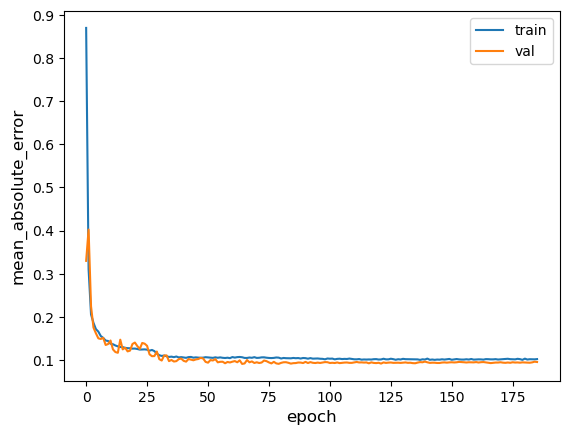

64/64 [==============================] - 0s 369us/step - loss: 0.0269 - mean_absolute_error: 0.1009
Test accuracy 0.10088784247636795
Test loss 0.02688027173280716


In [50]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [51]:
y_test_pred = multi_dense_model.predict(x_test)

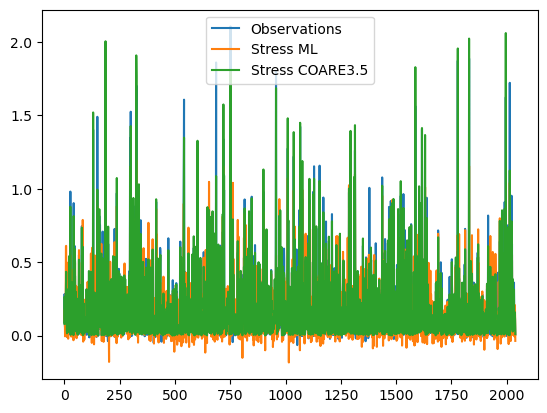

In [52]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

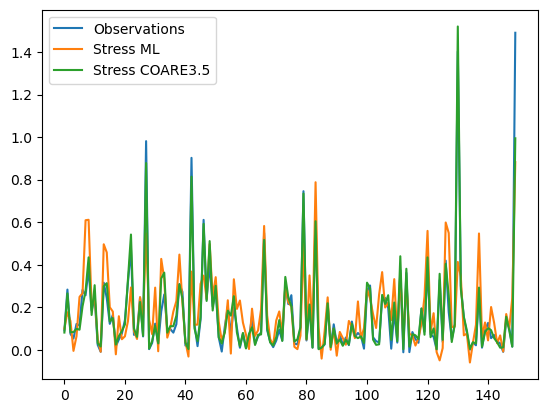

In [53]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [54]:
rmse(y_test.values, y_test_pred)

0.3074436809297074

## Correlation

In [55]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74390974],
       [0.74390974, 1.        ]])

In [56]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [57]:
y_test.values.shape

(2040,)

In [58]:
y_test_pred[:, 0].shape

(2040,)

In [59]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09144661, 0.28334564, 0.07565986, ..., 0.15754948, 0.06109848,
       0.00636154])

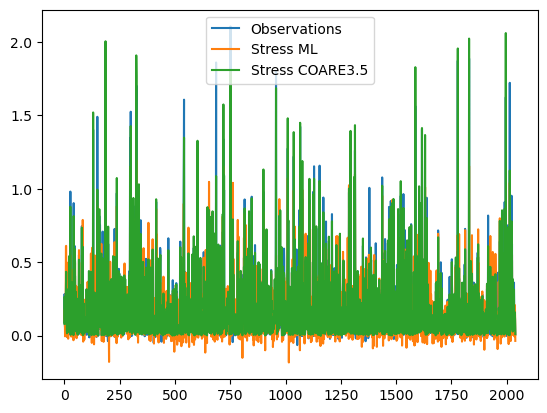

In [61]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

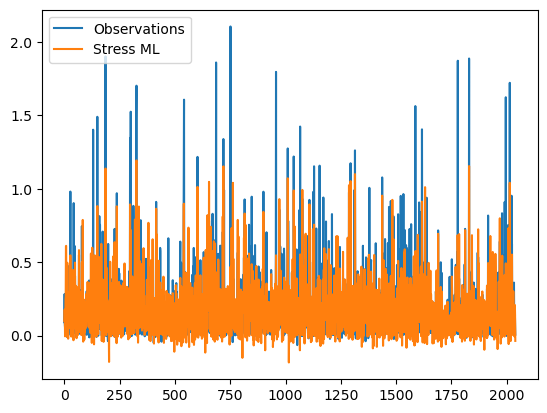

In [62]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [63]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [64]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3074436809297074

Text(0, 0.5, 'Stress ML [N/m²]')

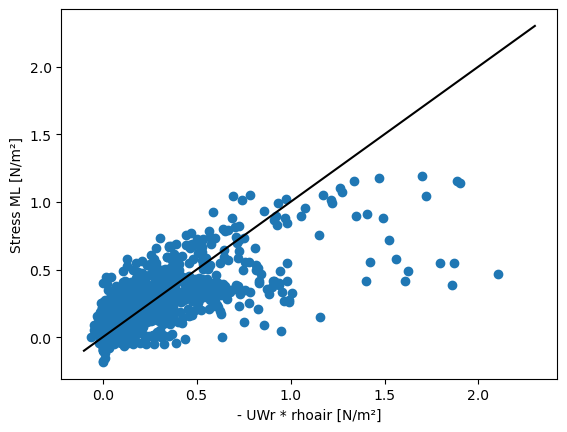

In [65]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [66]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [67]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [68]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 0.7326 - mean_absolute_error: 0.6761 - val_loss: 0.1736 - val_mean_absolute_error: 0.3196
Epoch 2/500
179/179 [==============================] - 0s 869us/step - loss: 0.3387 - mean_absolute_error: 0.4257 - val_loss: 0.0551 - val_mean_absolute_error: 0.1624
Epoch 3/500
179/179 [==============================] - 0s 824us/step - loss: 0.2070 - mean_absolute_error: 0.3304 - val_loss: 0.0462 - val_mean_absolute_error: 0.1465
Epoch 4/500
179/179 [==============================] - 0s 827us/step - loss: 0.1436 - mean_absolute_error: 0.2805 - val_loss: 0.0433 - val_mean_absolute_error: 0.1392
Epoch 5/500
179/179 [==============================] - 0s 820us/step - loss: 0.1199 - mean_absolute_error: 0.2519 - val_loss: 0.0422 - val_mean_absolute_error: 0.1395
Epoch 6/500
179/179 [==============================] - 0s 840us/step - loss: 0.1014 - mean_absolute_error: 0.2293 - val_loss: 0.0411 - val_mean_absolute_error: 0.1353


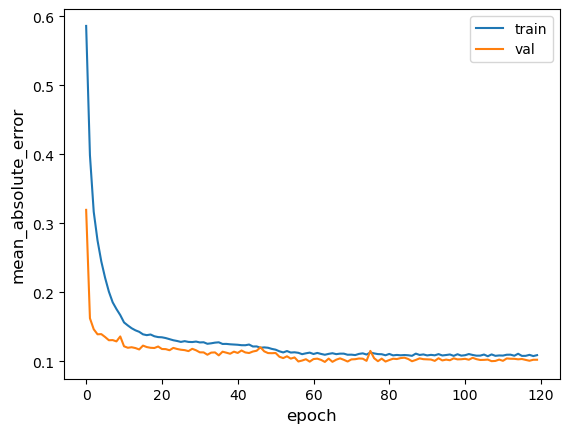

64/64 [==============================] - 0s 390us/step - loss: 0.0343 - mean_absolute_error: 0.1119
Test accuracy 0.1119106188416481
Test loss 0.03427876904606819


In [69]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [70]:
y_test_pred = multi_dense_model.predict(x_test)

In [71]:
rmse(y_test.values, y_test_pred)

0.2756381673279022

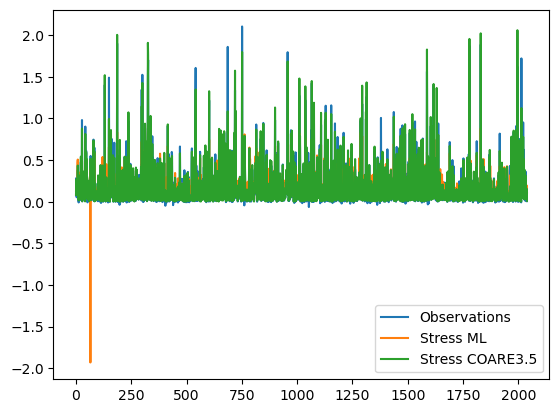

In [72]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

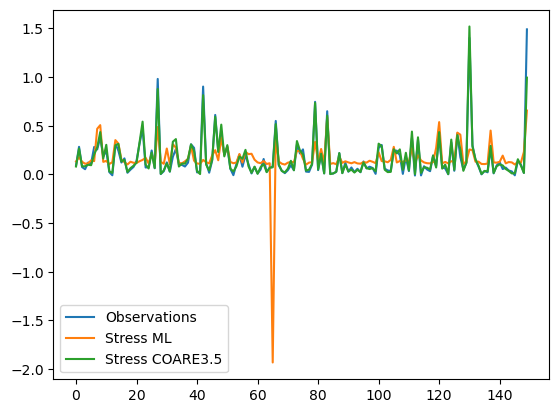

In [73]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [74]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67576527],
       [0.67576527, 1.        ]])

In [75]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

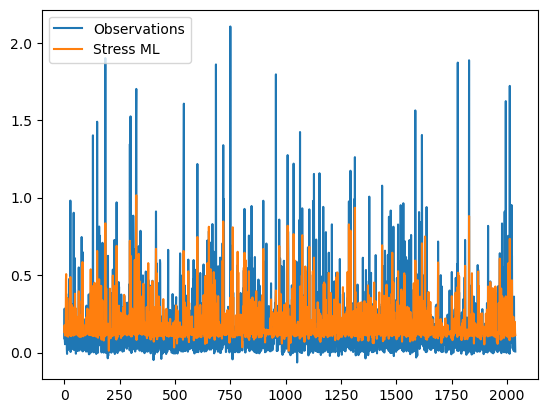

In [80]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [81]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [82]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.27171962603111094

Text(0, 0.5, 'Stress ML [N/m²]')

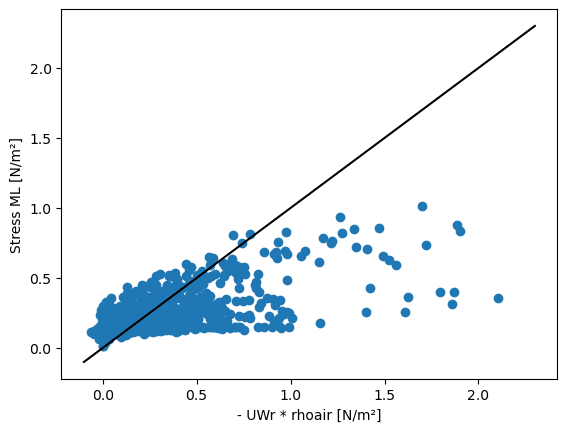

In [83]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [84]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [85]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [86]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.4052 - mean_absolute_error: 0.9035 - val_loss: 0.1913 - val_mean_absolute_error: 0.3421
Epoch 2/500
179/179 [==============================] - 0s 897us/step - loss: 0.5438 - mean_absolute_error: 0.5741 - val_loss: 0.0673 - val_mean_absolute_error: 0.1737
Epoch 3/500
179/179 [==============================] - 0s 860us/step - loss: 0.3175 - mean_absolute_error: 0.4167 - val_loss: 0.0492 - val_mean_absolute_error: 0.1382
Epoch 4/500
179/179 [==============================] - 0s 846us/step - loss: 0.1851 - mean_absolute_error: 0.3264 - val_loss: 0.0456 - val_mean_absolute_error: 0.1389
Epoch 5/500
179/179 [==============================] - 0s 793us/step - loss: 0.1452 - mean_absolute_error: 0.2865 - val_loss: 0.0447 - val_mean_absolute_error: 0.1416
Epoch 6/500
179/179 [==============================] - 0s 780us/step - loss: 0.1149 - mean_absolute_error: 0.2503 - val_loss: 0.0448 - val_mean_absolute_error: 0.1438


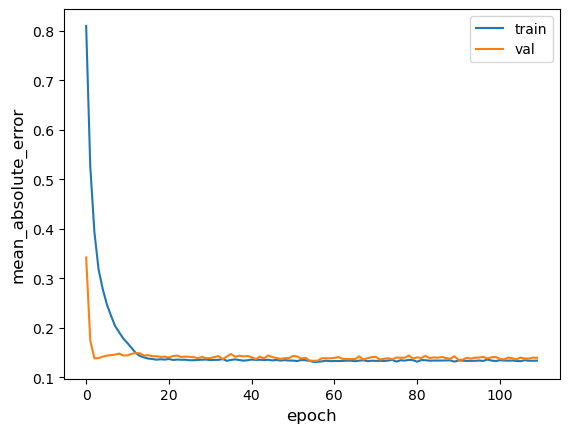

64/64 [==============================] - 0s 380us/step - loss: 0.1134 - mean_absolute_error: 0.1567
Test accuracy 0.15673018991947174
Test loss 0.11337525397539139


In [87]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [88]:
y_test_pred = multi_dense_model.predict(x_test)

In [89]:
rmse(y_test.values, y_test_pred)

0.3710114658595061

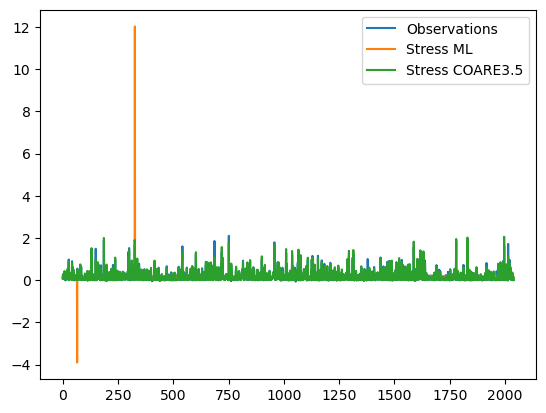

In [90]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

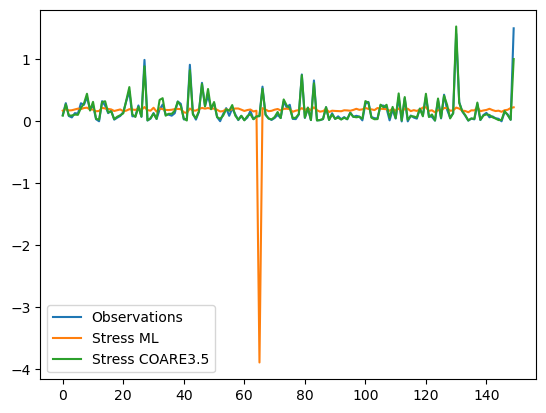

In [91]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

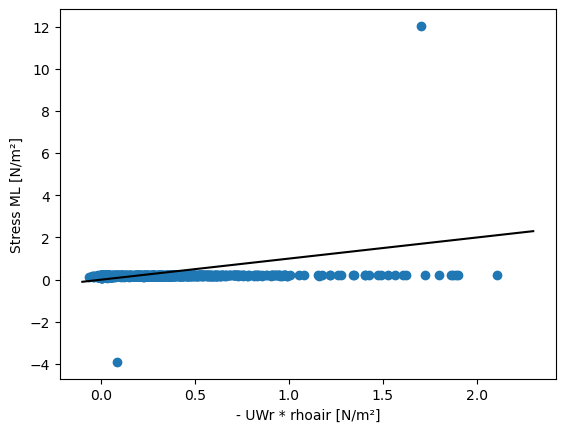

In [92]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [93]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17779467],
       [0.17779467, 1.        ]])

In [94]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [95]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [96]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [97]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
357/357 [==============================] - 1s 899us/step - loss: 1.4672 - mean_absolute_error: 0.9570 - val_loss: 0.0884 - val_mean_absolute_error: 0.2245
Epoch 2/500
357/357 [==============================] - 0s 634us/step - loss: 0.3794 - mean_absolute_error: 0.4624 - val_loss: 0.0526 - val_mean_absolute_error: 0.1492
Epoch 3/500
357/357 [==============================] - 0s 637us/step - loss: 0.2163 - mean_absolute_error: 0.3394 - val_loss: 0.0490 - val_mean_absolute_error: 0.1469
Epoch 4/500
357/357 [==============================] - 0s 645us/step - loss: 0.1348 - mean_absolute_error: 0.2641 - val_loss: 0.0471 - val_mean_absolute_error: 0.1432
Epoch 5/500
357/357 [==============================] - 0s 632us/step - loss: 0.0970 - mean_absolute_error: 0.2195 - val_loss: 0.0466 - val_mean_absolute_error: 0.1390
Epoch 6/500
357/357 [==============================] - 0s 639us/step - loss: 0.0808 - mean_absolute_error: 0.1942 - val_loss: 0.0466 - val_mean_absolute_error: 0.144

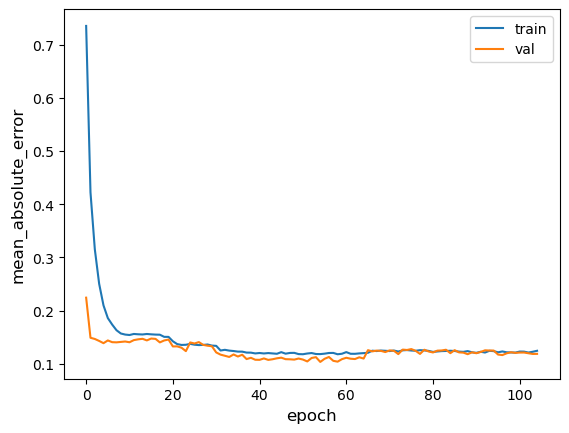

64/64 [==============================] - 0s 659us/step - loss: 0.0460 - mean_absolute_error: 0.1289
Test accuracy 0.12886451184749603
Test loss 0.045973122119903564


In [98]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [99]:
y_test_pred = multi_dense_model.predict(x_test)

In [100]:
rmse(y_test.values, y_test_pred)

0.2790303351078703

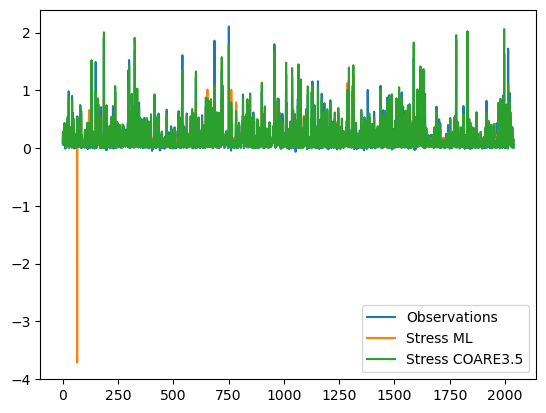

In [101]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

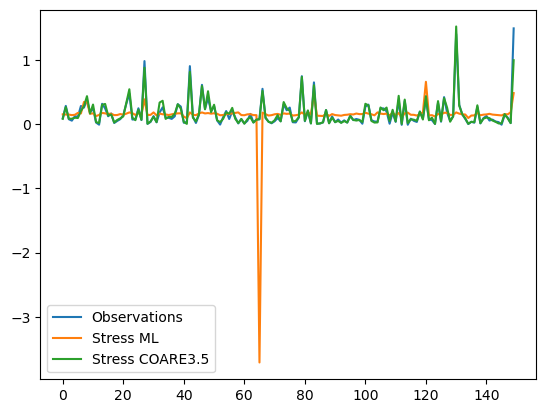

In [102]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

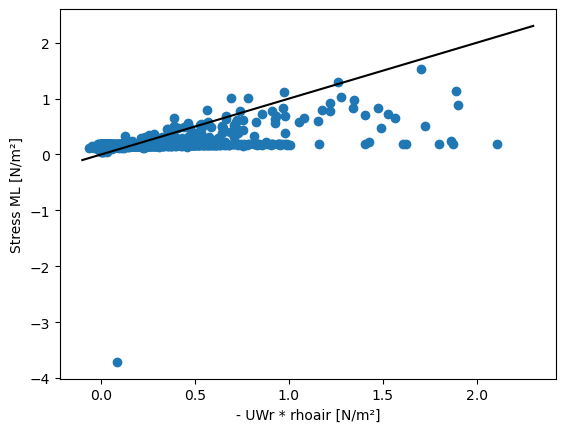

In [103]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [104]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.4890769],
       [0.4890769, 1.       ]])

In [105]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

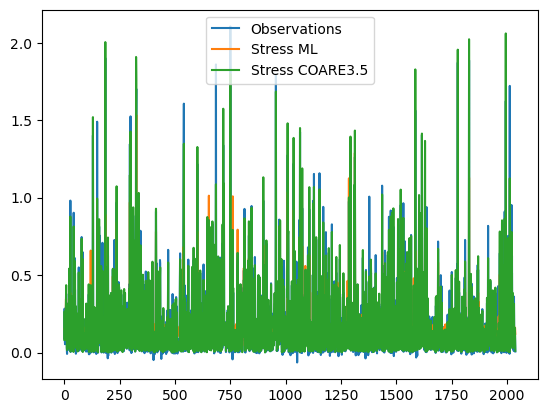

In [106]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

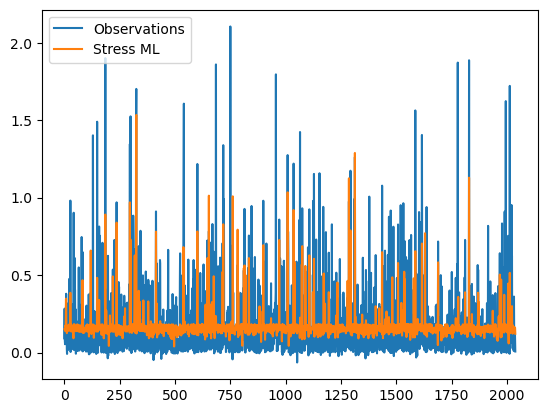

In [107]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [108]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [109]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26548434222248185

Text(0, 0.5, 'Stress ML [N/m²]')

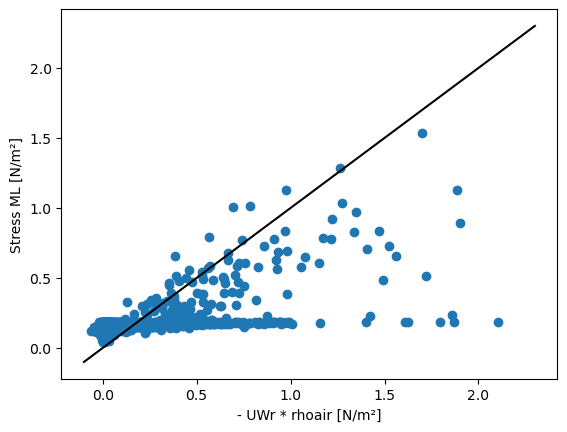

In [110]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [111]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [112]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [113]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 1s 2ms/step - loss: 1.3641 - mean_absolute_error: 0.8739 - val_loss: 0.3059 - val_mean_absolute_error: 0.4013
Epoch 2/500
90/90 [==============================] - 0s 957us/step - loss: 0.9148 - mean_absolute_error: 0.7285 - val_loss: 0.1201 - val_mean_absolute_error: 0.2589
Epoch 3/500
90/90 [==============================] - 0s 951us/step - loss: 0.7080 - mean_absolute_error: 0.6198 - val_loss: 0.0716 - val_mean_absolute_error: 0.1921
Epoch 4/500
90/90 [==============================] - 0s 930us/step - loss: 0.4875 - mean_absolute_error: 0.5262 - val_loss: 0.0574 - val_mean_absolute_error: 0.1589
Epoch 5/500
90/90 [==============================] - 0s 1ms/step - loss: 0.3907 - mean_absolute_error: 0.4570 - val_loss: 0.0486 - val_mean_absolute_error: 0.1371
Epoch 6/500
90/90 [==============================] - 0s 942us/step - loss: 0.3148 - mean_absolute_error: 0.4146 - val_loss: 0.0462 - val_mean_absolute_error: 0.1363
Epoch 7/500
90

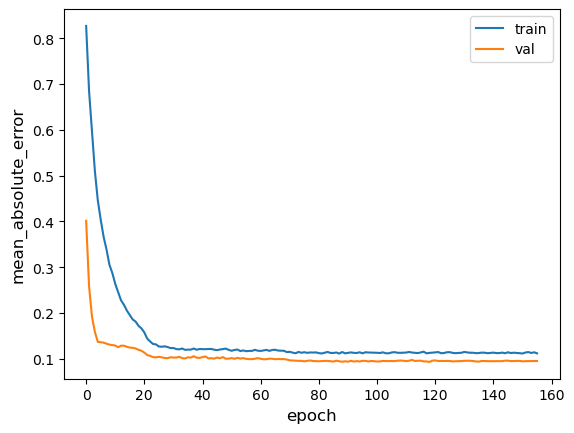

64/64 [==============================] - 0s 405us/step - loss: 0.0297 - mean_absolute_error: 0.1039
Test accuracy 0.10386300086975098
Test loss 0.02974052168428898


In [114]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [115]:
y_test_pred = multi_dense_model.predict(x_test)

In [116]:
rmse(y_test.values, y_test_pred)

0.27756953079365904

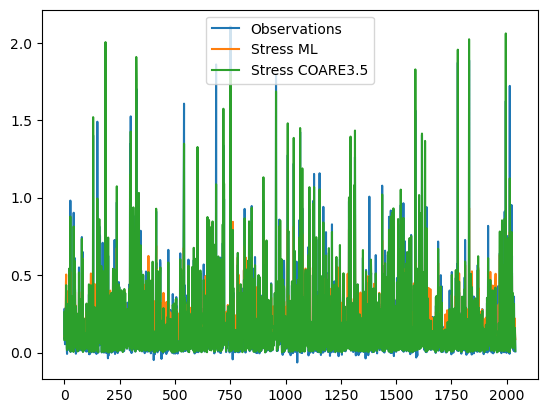

In [117]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

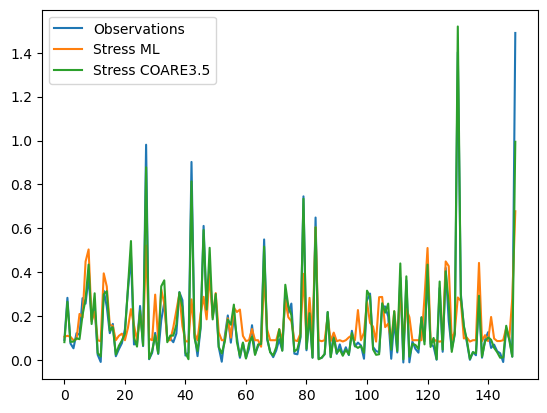

In [118]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

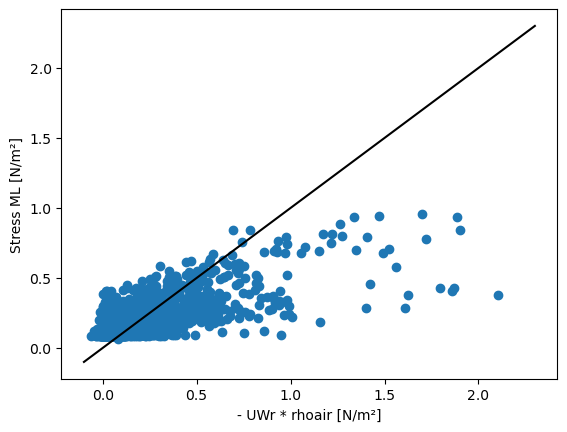

In [119]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [120]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74200576],
       [0.74200576, 1.        ]])

In [121]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

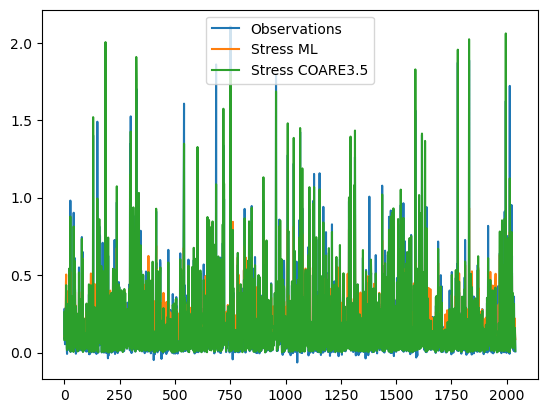

In [122]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

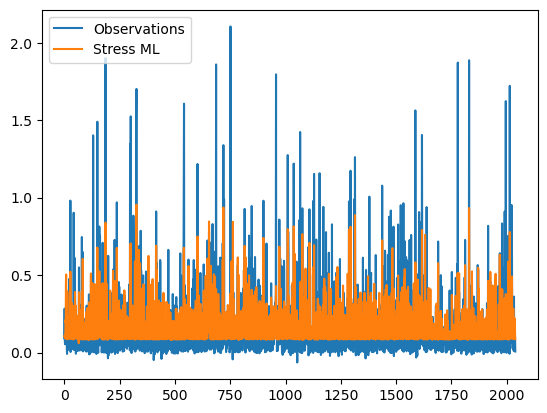

In [123]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [124]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [125]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.27756953079365904

Text(0, 0.5, 'Stress ML [N/m²]')

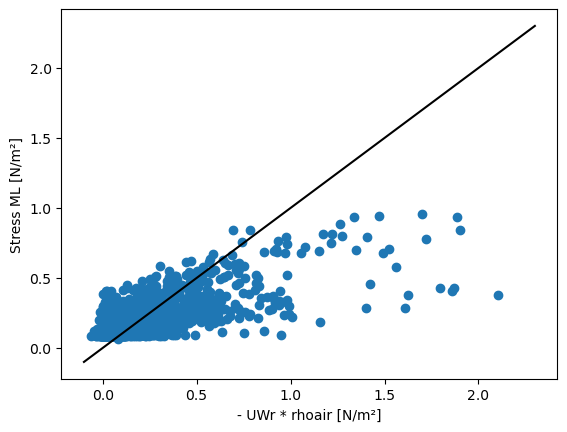

In [126]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [127]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [128]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [129]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 0.3423 - mean_absolute_error: 0.4368 - val_loss: 0.0555 - val_mean_absolute_error: 0.1597
Epoch 2/500
179/179 [==============================] - 0s 867us/step - loss: 0.1356 - mean_absolute_error: 0.2706 - val_loss: 0.0514 - val_mean_absolute_error: 0.1578
Epoch 3/500
179/179 [==============================] - 0s 865us/step - loss: 0.0918 - mean_absolute_error: 0.2121 - val_loss: 0.0473 - val_mean_absolute_error: 0.1445
Epoch 4/500
179/179 [==============================] - 0s 890us/step - loss: 0.0687 - mean_absolute_error: 0.1738 - val_loss: 0.0446 - val_mean_absolute_error: 0.1398
Epoch 5/500
179/179 [==============================] - 0s 812us/step - loss: 0.0575 - mean_absolute_error: 0.1588 - val_loss: 0.0444 - val_mean_absolute_error: 0.1394
Epoch 6/500
179/179 [==============================] - 0s 825us/step - loss: 0.0553 - mean_absolute_error: 0.1508 - val_loss: 0.0438 - val_mean_absolute_error: 0.1388


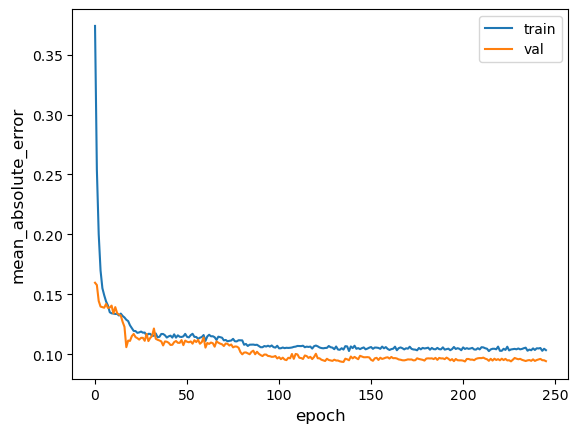

64/64 [==============================] - 0s 342us/step - loss: 0.0281 - mean_absolute_error: 0.1022
Test accuracy 0.10215512663125992
Test loss 0.028081104159355164


In [130]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [131]:
y_test_pred = multi_dense_model.predict(x_test)

In [132]:
rmse(y_test.values, y_test_pred)

0.2838370994016876

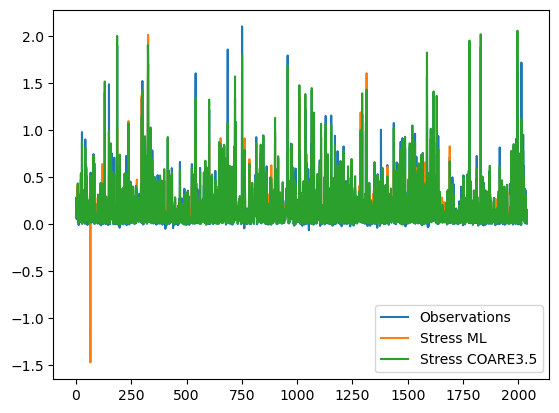

In [133]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

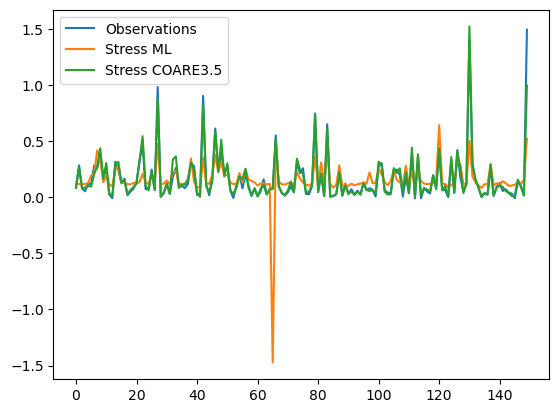

In [134]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

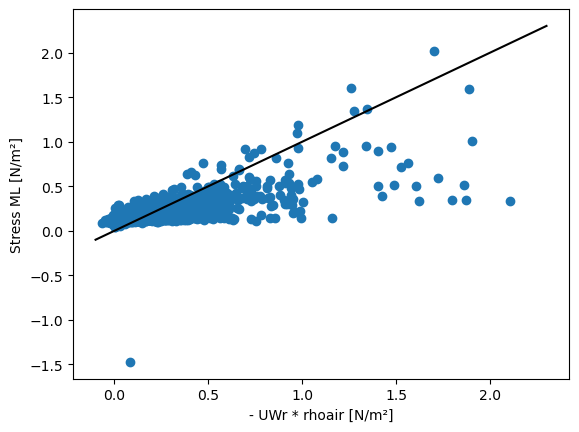

In [135]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [136]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74890381],
       [0.74890381, 1.        ]])

In [137]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

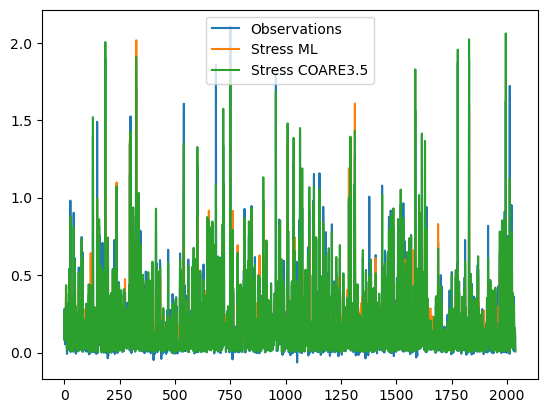

In [143]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

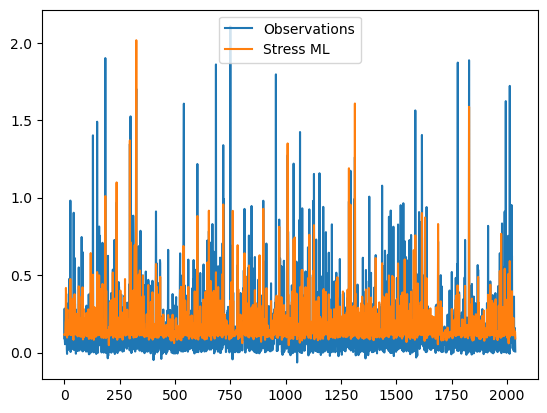

In [144]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [146]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [147]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2815460199562753

Text(0, 0.5, 'Stress ML [N/m²]')

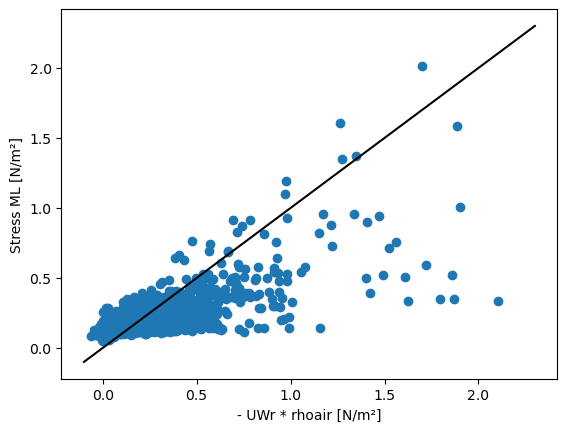

In [148]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [149]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [150]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [151]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.1209 - mean_absolute_error: 0.7954 - val_loss: 0.1534 - val_mean_absolute_error: 0.3253
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.3927 - mean_absolute_error: 0.4883 - val_loss: 0.0822 - val_mean_absolute_error: 0.2198
Epoch 3/500
179/179 [==============================] - 0s 889us/step - loss: 0.2096 - mean_absolute_error: 0.3573 - val_loss: 0.0645 - val_mean_absolute_error: 0.1992
Epoch 4/500
179/179 [==============================] - 0s 898us/step - loss: 0.1388 - mean_absolute_error: 0.2863 - val_loss: 0.0574 - val_mean_absolute_error: 0.1846
Epoch 5/500
179/179 [==============================] - 0s 930us/step - loss: 0.1001 - mean_absolute_error: 0.2378 - val_loss: 0.0526 - val_mean_absolute_error: 0.1758
Epoch 6/500
179/179 [==============================] - 0s 934us/step - loss: 0.0924 - mean_absolute_error: 0.2184 - val_loss: 0.0503 - val_mean_absolute_error: 0.1691
Ep

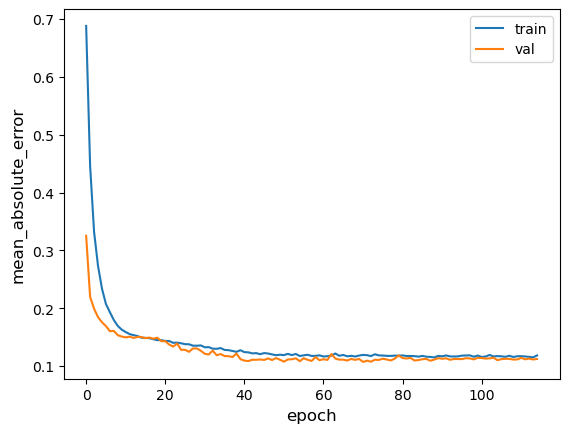

64/64 [==============================] - 0s 368us/step - loss: 0.0405 - mean_absolute_error: 0.1233
Test accuracy 0.12327906489372253
Test loss 0.0404665507376194


In [152]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [153]:
y_test_pred = multi_dense_model.predict(x_test)

In [154]:
rmse(y_test.values, y_test_pred)

0.2679373331479262

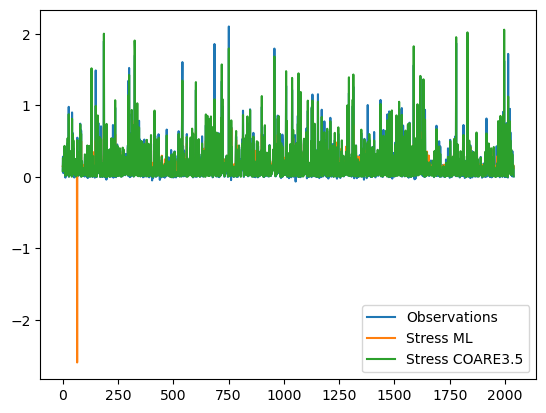

In [155]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

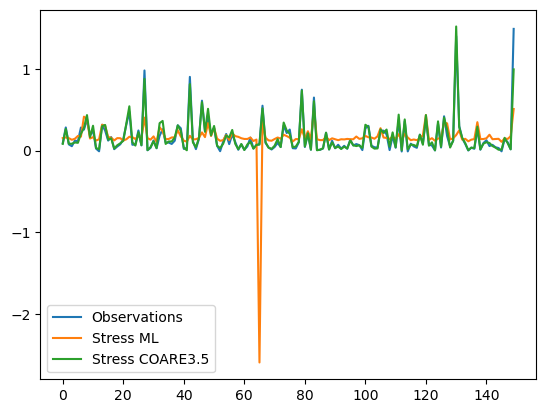

In [156]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

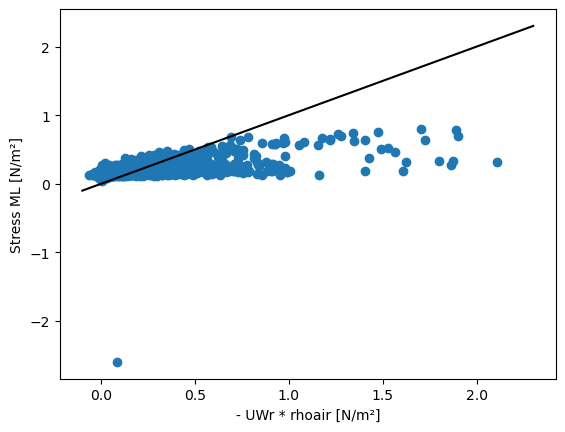

In [157]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [158]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.59195865],
       [0.59195865, 1.        ]])

In [159]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

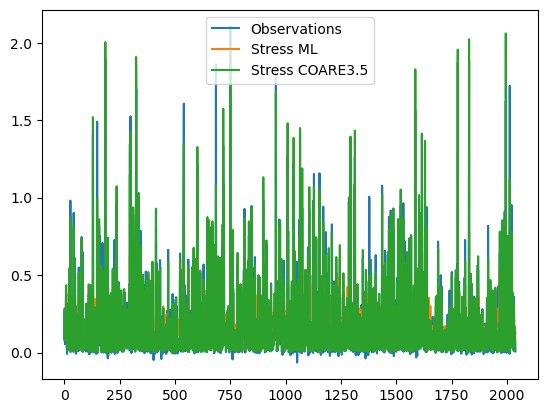

In [160]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

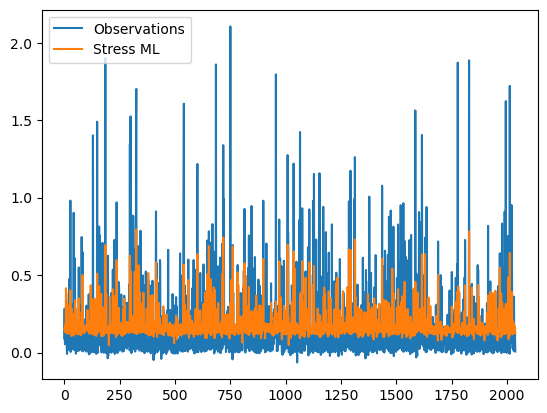

In [161]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [162]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [163]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.26087481402392226

Text(0, 0.5, 'Stress ML [N/m²]')

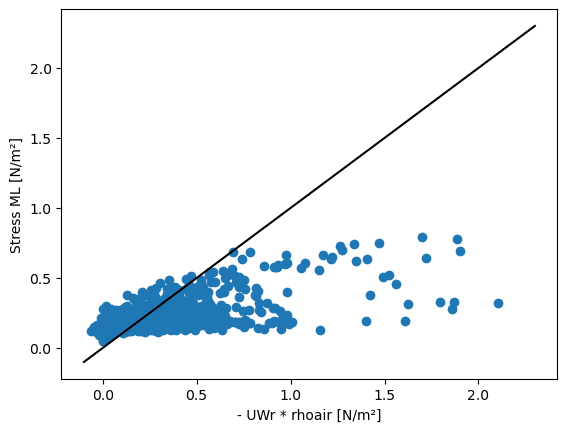

In [164]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.1075 - mean_absolute_error: 0.9051 - val_loss: 0.3085 - val_mean_absolute_error: 0.5094
Epoch 2/500
179/179 [==============================] - 0s 807us/step - loss: 0.3959 - mean_absolute_error: 0.4551 - val_loss: 0.1422 - val_mean_absolute_error: 0.3323
Epoch 3/500
179/179 [==============================] - 0s 800us/step - loss: 0.1829 - mean_absolute_error: 0.3457 - val_loss: 0.0946 - val_mean_absolute_error: 0.2574
Epoch 4/500
179/179 [==============================] - 0s 767us/step - loss: 0.1184 - mean_absolute_error: 0.2756 - val_loss: 0.0717 - val_mean_absolute_error: 0.2081
Epoch 5/500
179/179 [==============================] - 0s 803us/step - loss: 0.0985 - mean_absolute_error: 0.2303 - val_loss: 0.0599 - val_mean_absolute_error: 0.1757
Epoch 6/500
179/179 [==============================] - 0s 774us/step - loss: 0.0867 - mean_absolute_error: 0.2021 - val_loss: 0.0536 - val_mean_absolute_error: 0.1583


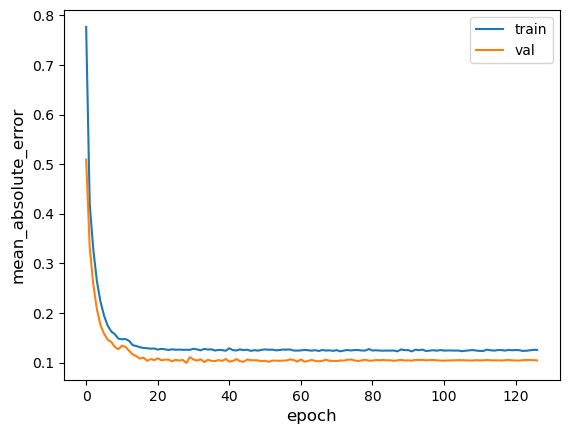

64/64 [==============================] - 0s 348us/step - loss: 0.0350 - mean_absolute_error: 0.1151
Test accuracy 0.11513247340917587
Test loss 0.03498407080769539


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_pred = multi_dense_model.predict(x_test)

In [170]:
rmse(y_test.values, y_test_pred)

0.2681044510753872

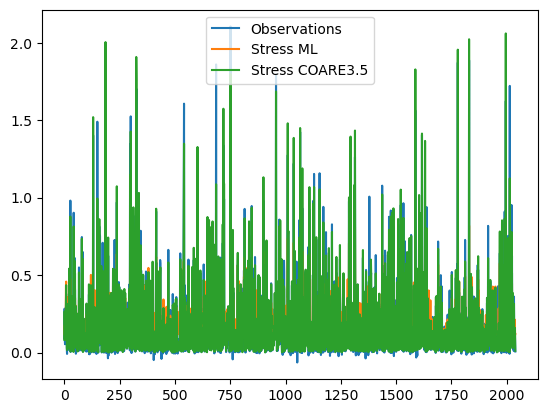

In [171]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

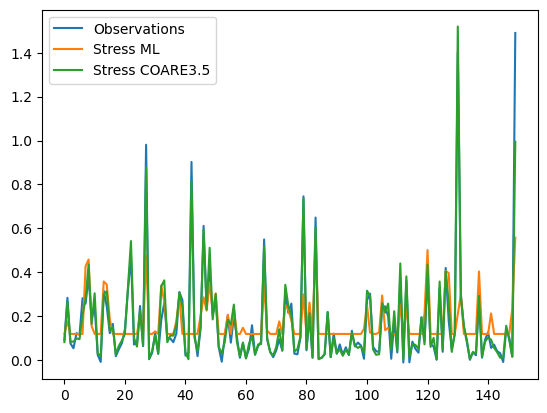

In [172]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

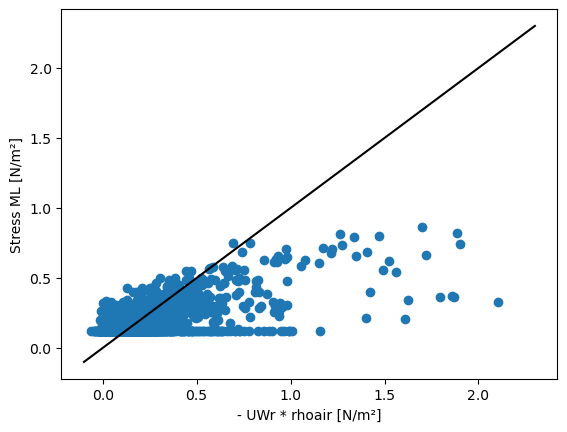

In [173]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [174]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.69517861],
       [0.69517861, 1.        ]])

In [175]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

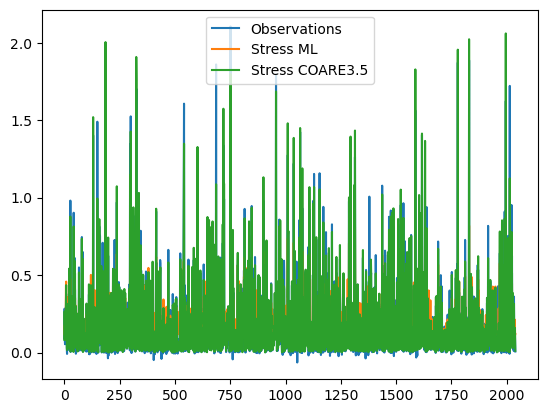

In [176]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

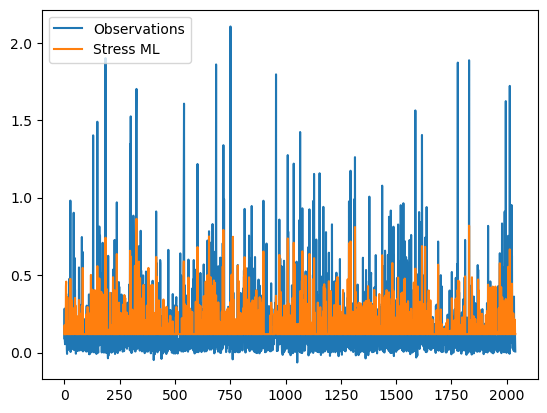

In [177]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [178]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [179]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2681044510753872

Text(0, 0.5, 'Stress ML [N/m²]')

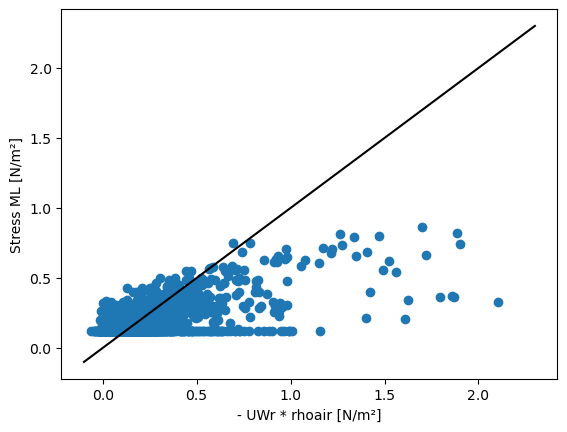

In [180]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [181]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [182]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [183]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.6274 - mean_absolute_error: 0.9094 - val_loss: 0.1347 - val_mean_absolute_error: 0.3021
Epoch 2/500
179/179 [==============================] - 0s 856us/step - loss: 0.7415 - mean_absolute_error: 0.6006 - val_loss: 0.0645 - val_mean_absolute_error: 0.1863
Epoch 3/500
179/179 [==============================] - 0s 806us/step - loss: 0.4530 - mean_absolute_error: 0.4677 - val_loss: 0.0566 - val_mean_absolute_error: 0.1667
Epoch 4/500
179/179 [==============================] - 0s 781us/step - loss: 0.2949 - mean_absolute_error: 0.3900 - val_loss: 0.0506 - val_mean_absolute_error: 0.1526
Epoch 5/500
179/179 [==============================] - 0s 791us/step - loss: 0.2166 - mean_absolute_error: 0.3241 - val_loss: 0.0483 - val_mean_absolute_error: 0.1468
Epoch 6/500
179/179 [==============================] - 0s 825us/step - loss: 0.1572 - mean_absolute_error: 0.2823 - val_loss: 0.0462 - val_mean_absolute_error: 0.1393


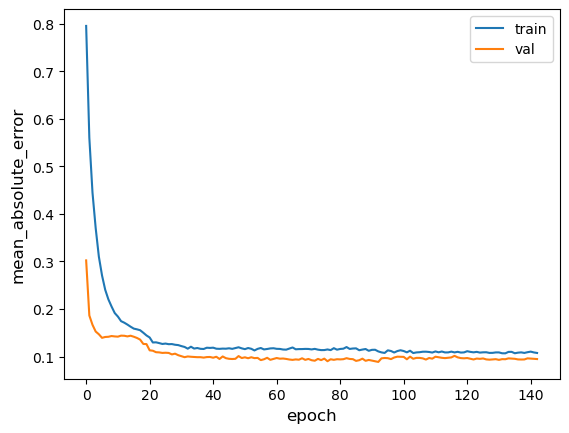

64/64 [==============================] - 0s 330us/step - loss: 0.0288 - mean_absolute_error: 0.1042
Test accuracy 0.10423837602138519
Test loss 0.028833573684096336


In [184]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [185]:
y_test_pred = multi_dense_model.predict(x_test)

In [186]:
rmse(y_test.values, y_test_pred)

0.2773237313331771

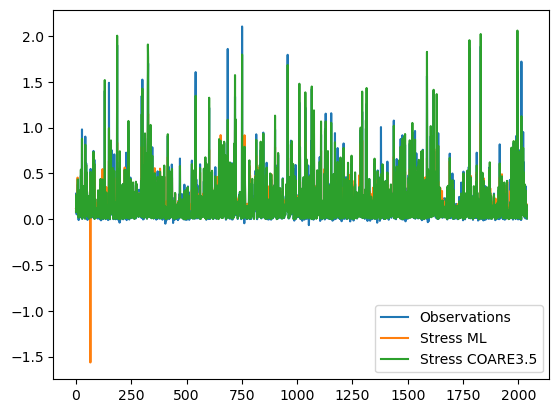

In [187]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

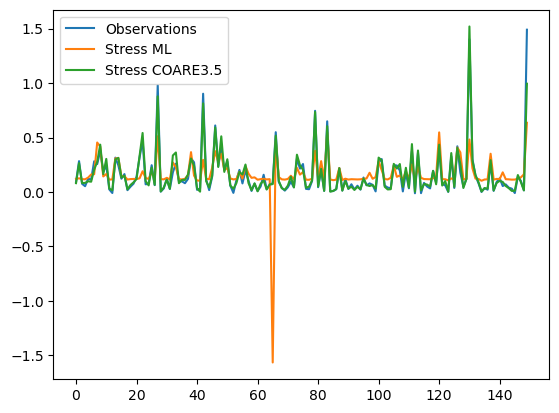

In [188]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

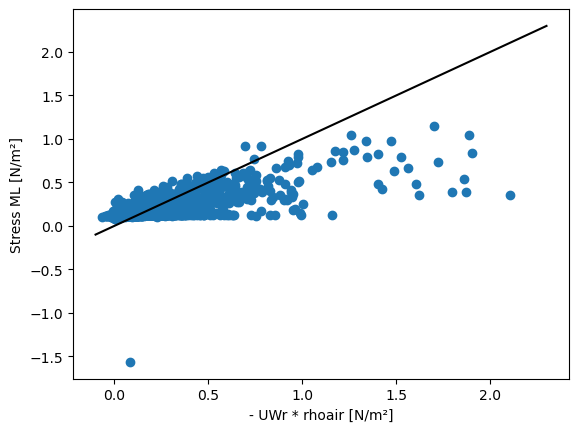

In [189]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [190]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75714994],
       [0.75714994, 1.        ]])

In [191]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

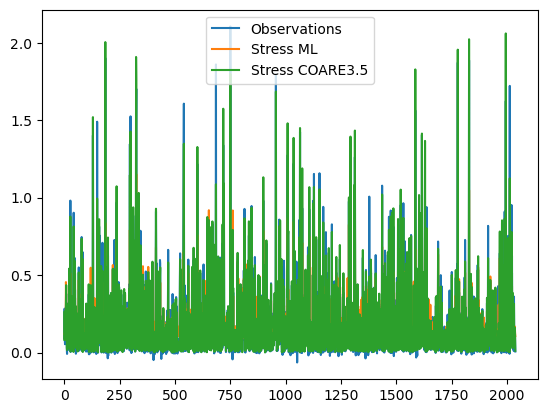

In [192]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

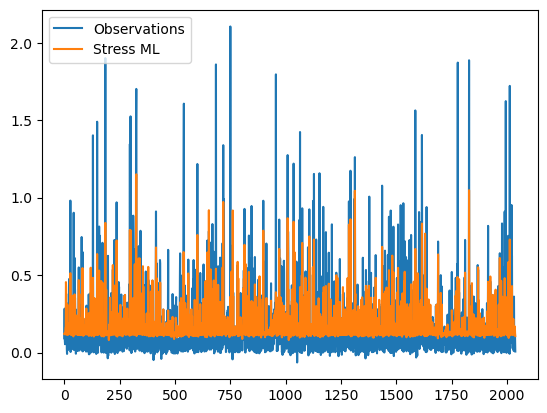

In [193]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [194]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [195]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2746941985730254

Text(0, 0.5, 'Stress ML [N/m²]')

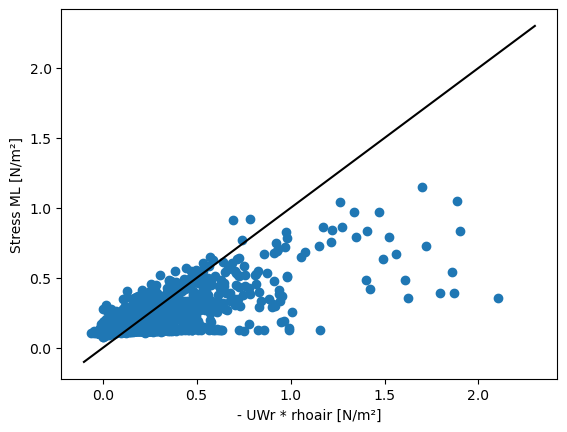

In [196]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [197]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [198]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [199]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.6),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 6.7063 - mean_absolute_error: 1.8034 - val_loss: 0.7084 - val_mean_absolute_error: 0.6781
Epoch 2/500
179/179 [==============================] - 0s 847us/step - loss: 2.0977 - mean_absolute_error: 0.9955 - val_loss: 0.1802 - val_mean_absolute_error: 0.3336
Epoch 3/500
179/179 [==============================] - 0s 826us/step - loss: 0.9387 - mean_absolute_error: 0.7073 - val_loss: 0.1628 - val_mean_absolute_error: 0.2555
Epoch 4/500
179/179 [==============================] - 0s 817us/step - loss: 0.6691 - mean_absolute_error: 0.5858 - val_loss: 0.3261 - val_mean_absolute_error: 0.2325
Epoch 5/500
179/179 [==============================] - 0s 831us/step - loss: 0.4286 - mean_absolute_error: 0.4923 - val_loss: 0.7343 - val_mean_absolute_error: 0.2152
Epoch 6/500
179/179 [==============================] - 0s 816us/step - loss: 0.3095 - mean_absolute_error: 0.4228 - val_loss: 1.1210 - val_mean_absolute_error: 0.2064


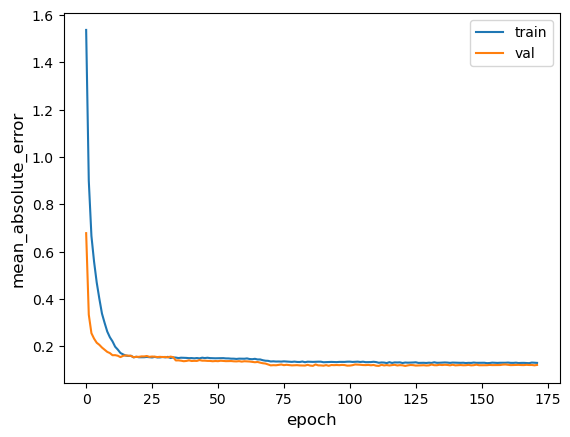

64/64 [==============================] - 0s 363us/step - loss: 0.0445 - mean_absolute_error: 0.1329
Test accuracy 0.13288088142871857
Test loss 0.04449145123362541


In [200]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [201]:
y_test_pred = multi_dense_model.predict(x_test)

In [202]:
rmse(y_test.values, y_test_pred)

0.2551172272187506

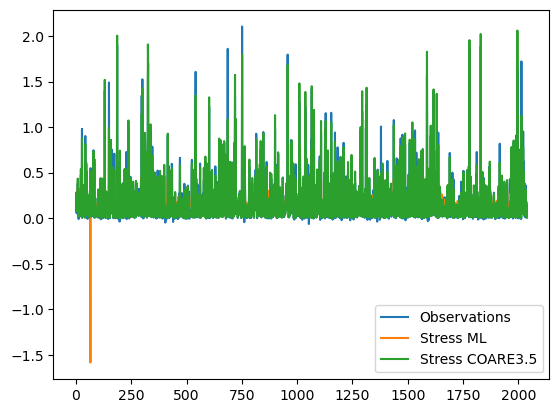

In [203]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

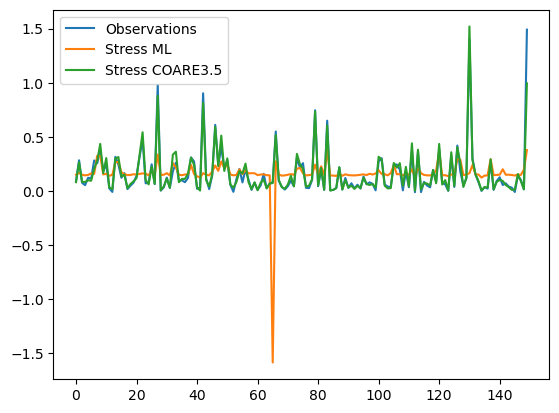

In [204]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

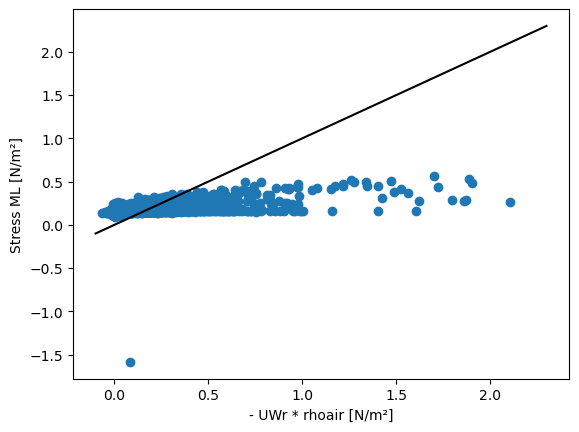

In [205]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [206]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.59788707],
       [0.59788707, 1.        ]])

In [207]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

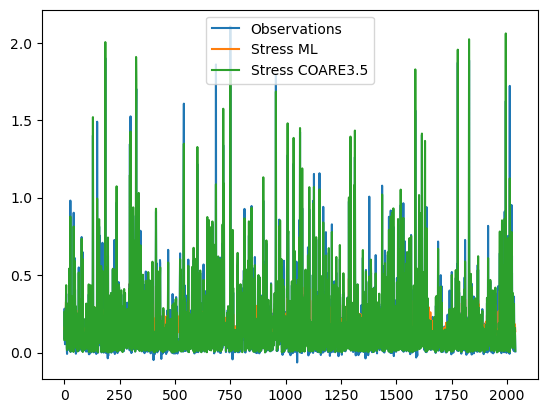

In [208]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

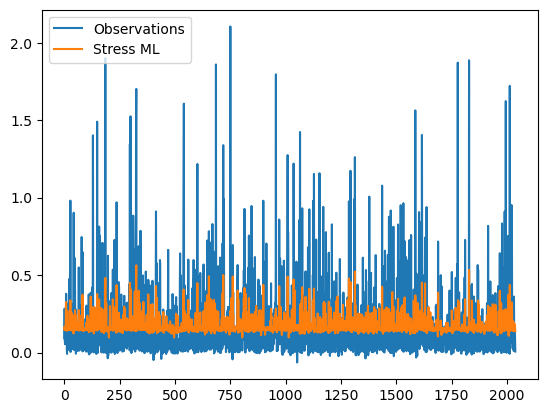

In [209]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [210]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [211]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2521773719844501

Text(0, 0.5, 'Stress ML [N/m²]')

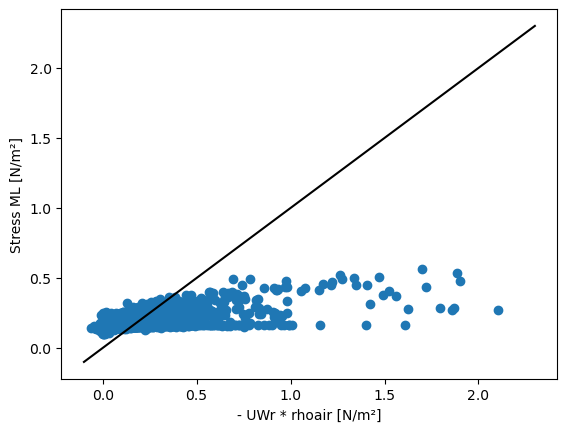

In [212]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [213]:
OUT_STEPS = 1
num_features = 1
batch_size =128*
epochs=500

metric = 'mean_absolute_error'

SyntaxError: invalid syntax (4243221823.py, line 3)

In [214]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [215]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.8101 - mean_absolute_error: 1.3011 - val_loss: 0.3068 - val_mean_absolute_error: 0.4769
Epoch 2/500
179/179 [==============================] - 0s 859us/step - loss: 0.5175 - mean_absolute_error: 0.5660 - val_loss: 0.0792 - val_mean_absolute_error: 0.2049
Epoch 3/500
179/179 [==============================] - 0s 830us/step - loss: 0.3462 - mean_absolute_error: 0.4289 - val_loss: 0.0543 - val_mean_absolute_error: 0.1594
Epoch 4/500
179/179 [==============================] - 0s 849us/step - loss: 0.2726 - mean_absolute_error: 0.3813 - val_loss: 0.0466 - val_mean_absolute_error: 0.1416
Epoch 5/500
179/179 [==============================] - 0s 827us/step - loss: 0.2208 - mean_absolute_error: 0.3329 - val_loss: 0.0427 - val_mean_absolute_error: 0.1369
Epoch 6/500
179/179 [==============================] - 0s 797us/step - loss: 0.1668 - mean_absolute_error: 0.2919 - val_loss: 0.0405 - val_mean_absolute_error: 0.1290


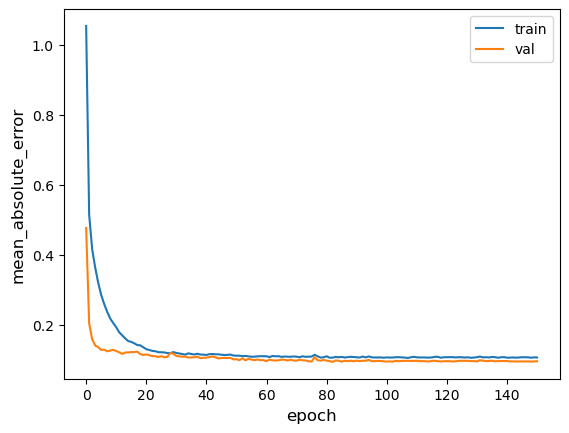

64/64 [==============================] - 0s 389us/step - loss: 0.0309 - mean_absolute_error: 0.1063
Test accuracy 0.10634525865316391
Test loss 0.030871249735355377


In [216]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [217]:
y_test_pred = multi_dense_model.predict(x_test)

In [218]:
rmse(y_test.values, y_test_pred)

0.2780948004944301

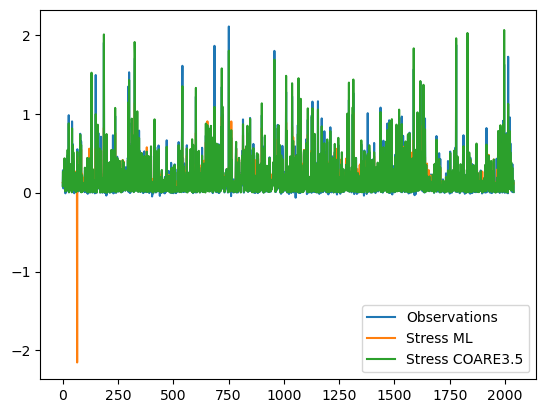

In [219]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

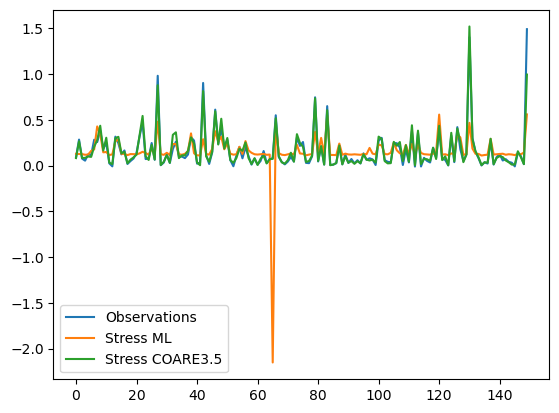

In [220]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

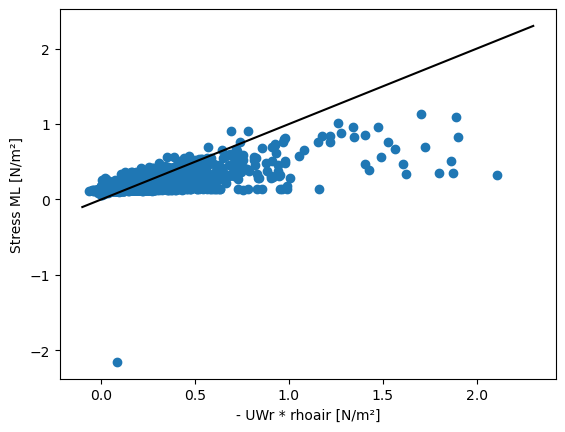

In [221]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [222]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72261393],
       [0.72261393, 1.        ]])

In [223]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

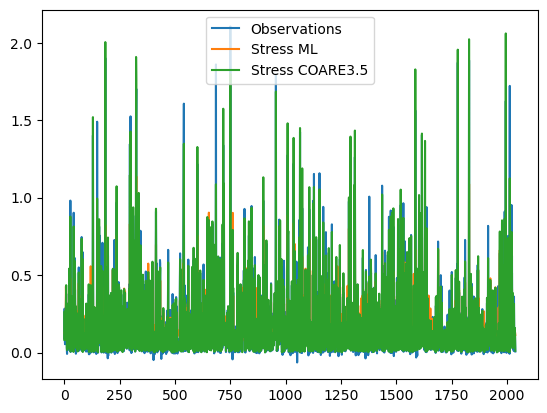

In [224]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

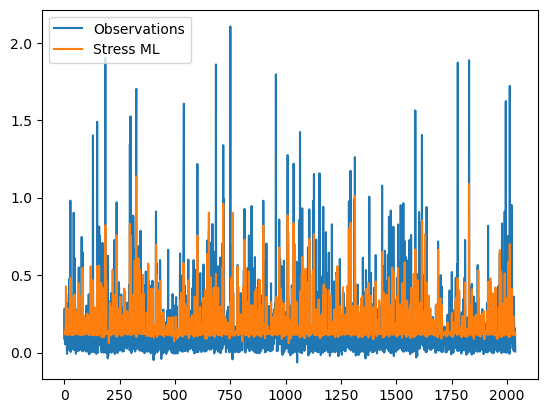

In [225]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [230]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1, 0])

array([[1.        , 0.78238092],
       [0.78238092, 1.        ]])

In [226]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [227]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.27333710482994467

Text(0, 0.5, 'Stress ML [N/m²]')

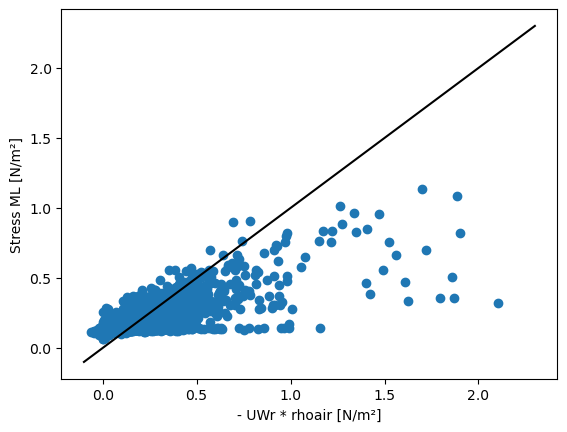

In [228]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [231]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [232]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [233]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 0.5964 - mean_absolute_error: 0.5904 - val_loss: 0.0965 - val_mean_absolute_error: 0.2512
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.2693 - mean_absolute_error: 0.4009 - val_loss: 0.0398 - val_mean_absolute_error: 0.1416
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.1725 - mean_absolute_error: 0.3132 - val_loss: 0.0384 - val_mean_absolute_error: 0.1309
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.1100 - mean_absolute_error: 0.2474 - val_loss: 0.0337 - val_mean_absolute_error: 0.1212
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.0696 - mean_absolute_error: 0.1922 - val_loss: 0.0296 - val_mean_absolute_error: 0.1022
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.0545 - mean_absolute_error: 0.1623 - val_loss: 0.0330 - val_mean_absolute_error: 0.1110
Epoch 7/50

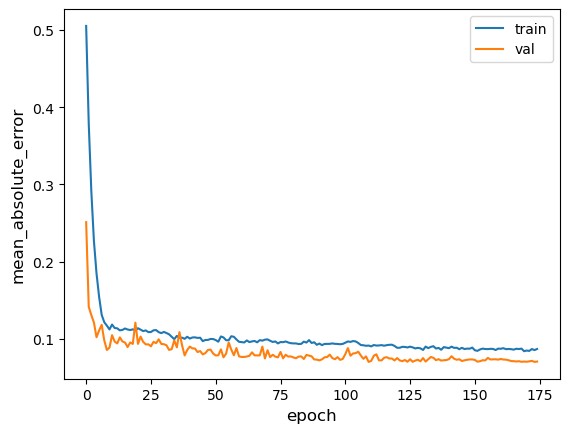

64/64 [==============================] - 0s 415us/step - loss: 0.0317 - mean_absolute_error: 0.0808
Test accuracy 0.08076886832714081
Test loss 0.03174887225031853


In [234]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [235]:
y_test_pred = multi_dense_model.predict(x_test)

In [236]:
rmse(y_test.values, y_test_pred)

0.34710741585367383

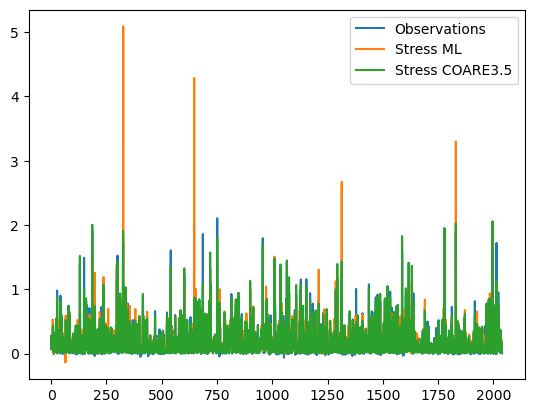

In [237]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

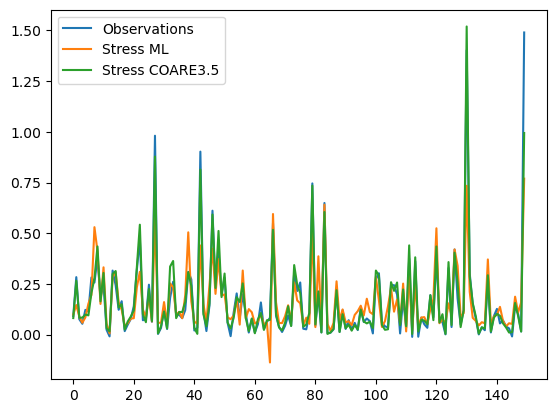

In [238]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

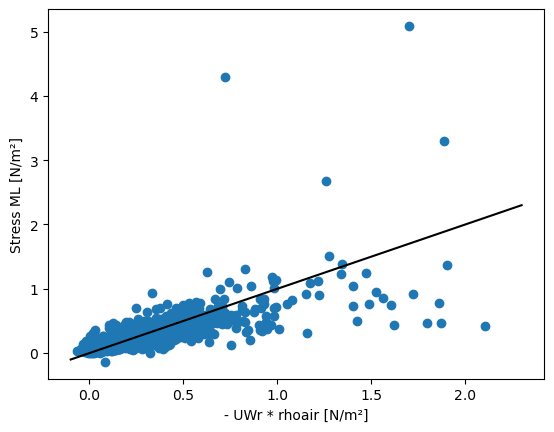

In [253]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [239]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73667289],
       [0.73667289, 1.        ]])

In [240]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

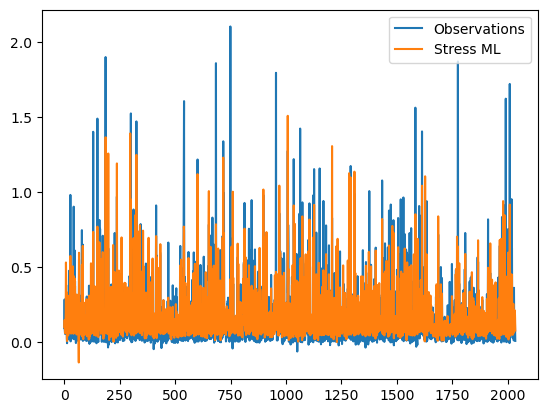

In [241]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [254]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97249972],
       [0.97249972, 1.        ]])

In [255]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.298981360944173

Text(0, 0.5, 'Stress ML [N/m²]')

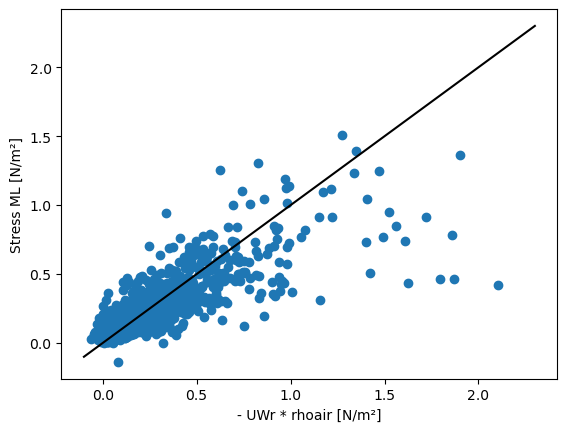

In [256]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [257]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73667289],
       [0.73667289, 1.        ]])

In [258]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [263]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [264]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [265]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 4ms/step - loss: 3.7165 - mean_absolute_error: 1.1295 - val_loss: 0.1237 - val_mean_absolute_error: 0.2833
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.4788 - mean_absolute_error: 0.5283 - val_loss: 0.1432 - val_mean_absolute_error: 0.3383
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.3366 - mean_absolute_error: 0.4536 - val_loss: 0.0481 - val_mean_absolute_error: 0.1477
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.2724 - mean_absolute_error: 0.3991 - val_loss: 0.0355 - val_mean_absolute_error: 0.1416
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.1845 - mean_absolute_error: 0.3350 - val_loss: 0.0318 - val_mean_absolute_error: 0.1264
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.1318 - mean_absolute_error: 0.2818 - val_loss: 0.0324 - val_mean_absolute_error: 0.1154
Epoch 7/50

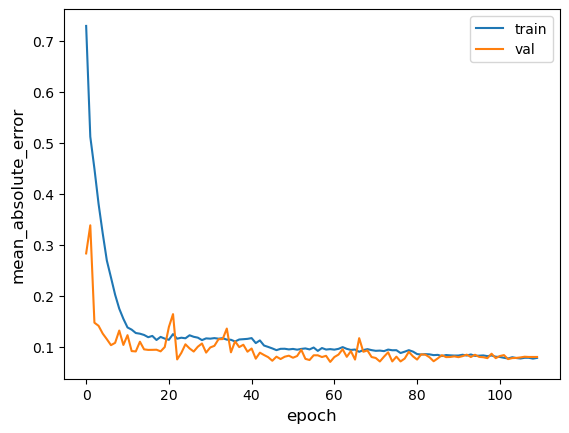

64/64 [==============================] - 0s 699us/step - loss: 0.0775 - mean_absolute_error: 0.0917
Test accuracy 0.09165120869874954
Test loss 0.07754947990179062


In [266]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [267]:
y_test_pred = multi_dense_model.predict(x_test)

In [268]:
rmse(y_test.values, y_test_pred)

0.39242033298873547

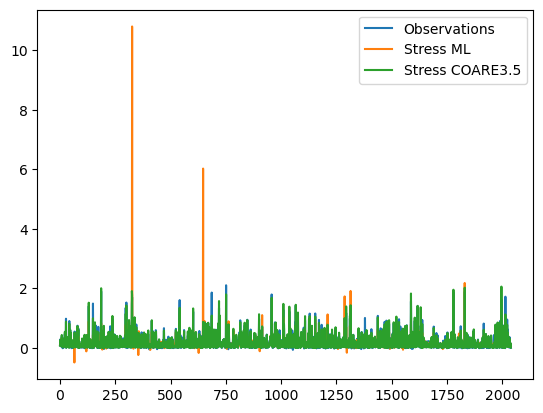

In [269]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

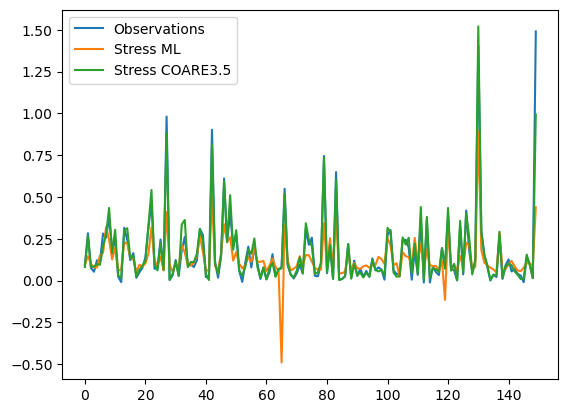

In [270]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [271]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.51019383],
       [0.51019383, 1.        ]])

In [272]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

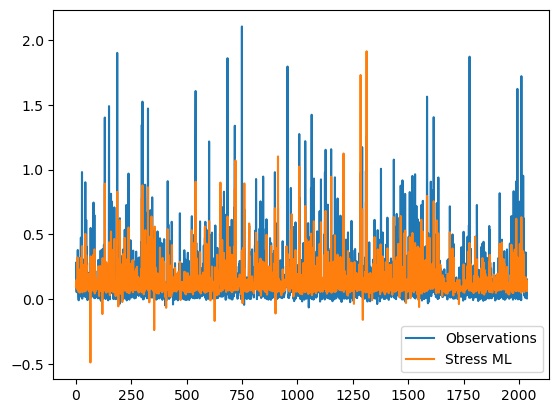

In [273]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [274]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97270094],
       [0.97270094, 1.        ]])

In [275]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.27778331903066233

Text(0, 0.5, 'Stress ML [N/m²]')

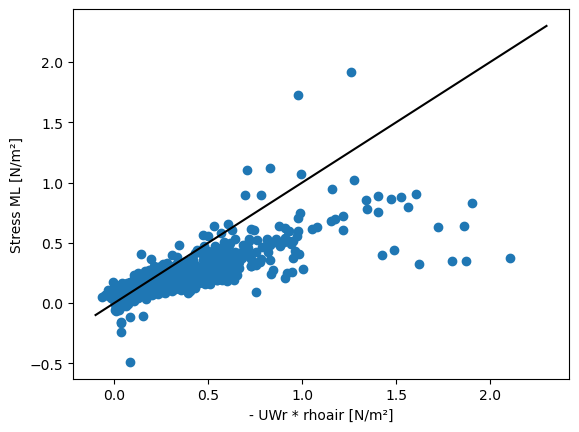

In [276]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [285]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [286]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [287]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 2.1730 - mean_absolute_error: 0.9449 - val_loss: 0.1063 - val_mean_absolute_error: 0.2727
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 0.4512 - mean_absolute_error: 0.5211 - val_loss: 0.0753 - val_mean_absolute_error: 0.2114
Epoch 3/500
179/179 [==============================] - 2s 11ms/step - loss: 0.3182 - mean_absolute_error: 0.4389 - val_loss: 0.0785 - val_mean_absolute_error: 0.2136
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.2237 - mean_absolute_error: 0.3612 - val_loss: 0.0324 - val_mean_absolute_error: 0.1098
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1461 - mean_absolute_error: 0.2949 - val_loss: 0.0463 - val_mean_absolute_error: 0.1578
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1076 - mean_absolute_error: 0.2477 - val_loss: 0.0298 - val_mean_absolute_error: 0.1124
Epoc

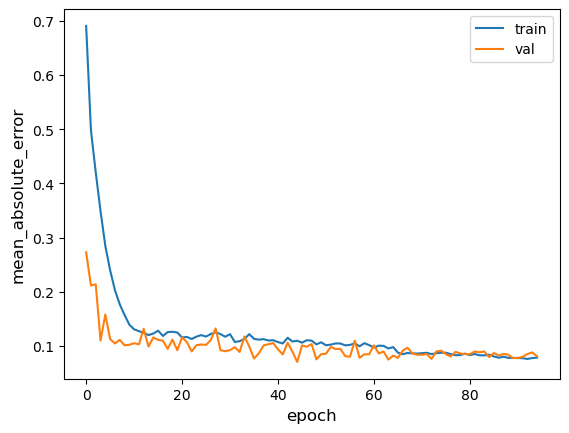

64/64 [==============================] - 0s 2ms/step - loss: 0.0269 - mean_absolute_error: 0.0878
Test accuracy 0.0877537727355957
Test loss 0.026862047612667084


In [288]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [289]:
y_test_pred = multi_dense_model.predict(x_test)

In [290]:
rmse(y_test.values, y_test_pred)

0.27816511758224116

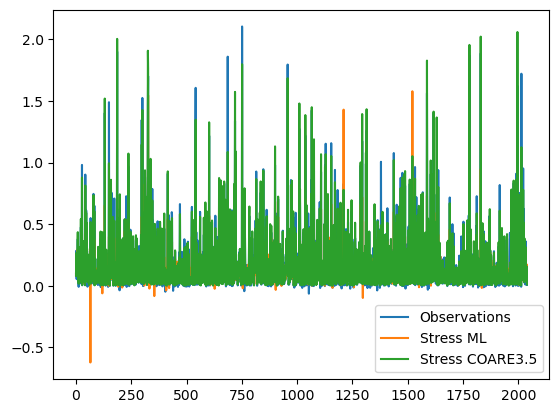

In [291]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

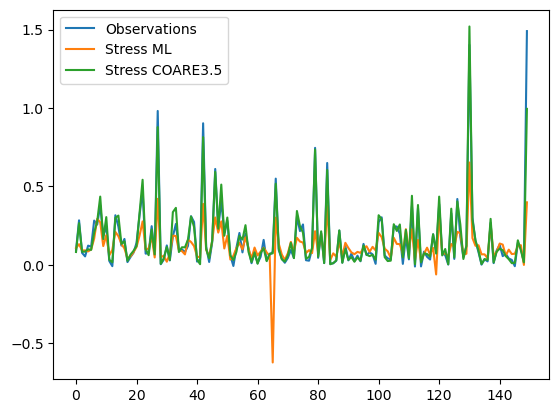

In [292]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [293]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83224719],
       [0.83224719, 1.        ]])

In [294]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

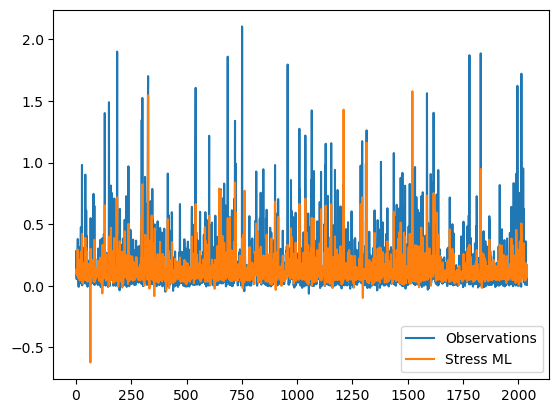

In [295]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [296]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [297]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.27816511758224116

Text(0, 0.5, 'Stress ML [N/m²]')

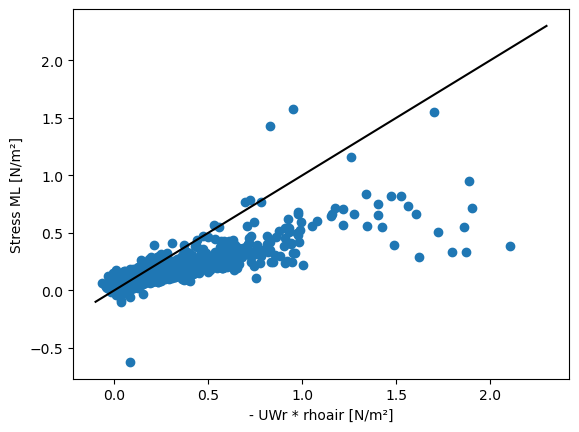

In [298]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

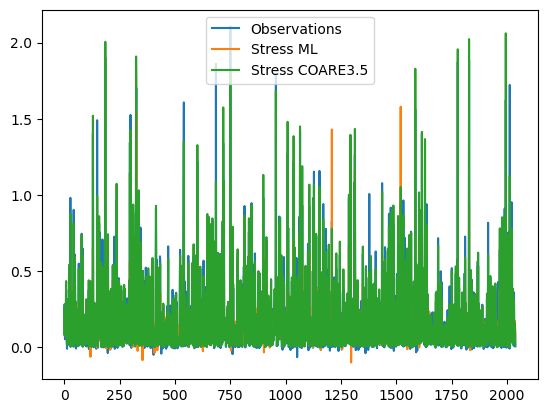

In [299]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

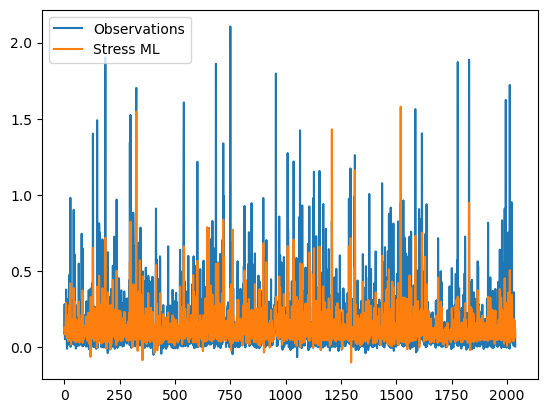

In [300]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [301]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.83883736],
       [0.83883736, 1.        ]])

In [302]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [303]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.27767026461112954

Text(0, 0.5, 'Stress ML [N/m²]')

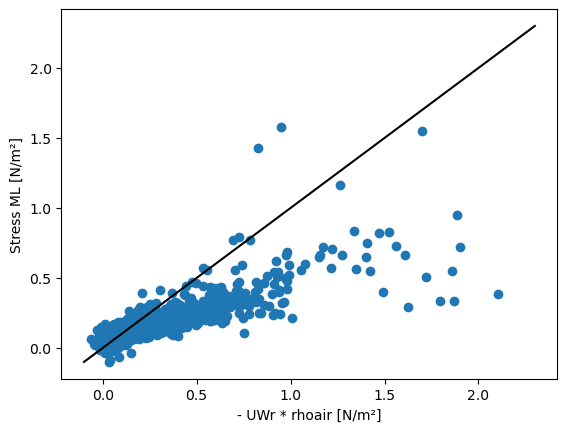

In [304]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [305]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [306]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [307]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 2s 39ms/step - loss: 27.1119 - mean_absolute_error: 3.0819 - val_loss: 5.3482 - val_mean_absolute_error: 2.0249
Epoch 2/500
12/12 [==============================] - 0s 27ms/step - loss: 0.8734 - mean_absolute_error: 0.7322 - val_loss: 11.6128 - val_mean_absolute_error: 2.8502
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 0.6691 - mean_absolute_error: 0.6472 - val_loss: 3.2568 - val_mean_absolute_error: 1.4770
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 0.6309 - mean_absolute_error: 0.6251 - val_loss: 3.3273 - val_mean_absolute_error: 1.6260
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 0.5769 - mean_absolute_error: 0.5937 - val_loss: 1.1314 - val_mean_absolute_error: 0.7650
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 0.5367 - mean_absolute_error: 0.5744 - val_loss: 0.9752 - val_mean_absolute_error: 0.7930
Epoch 7/500
12

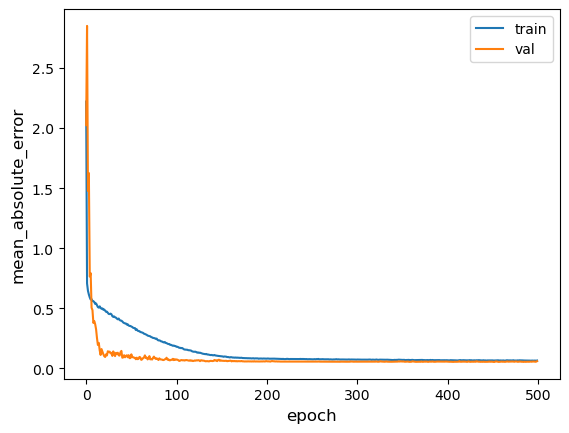

64/64 [==============================] - 0s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0638
Test accuracy 0.06384182721376419
Test loss 0.01342820469290018


In [308]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [309]:
y_test_pred = multi_dense_model.predict(x_test)

In [310]:
rmse(y_test.values, y_test_pred)

0.3143342119668436

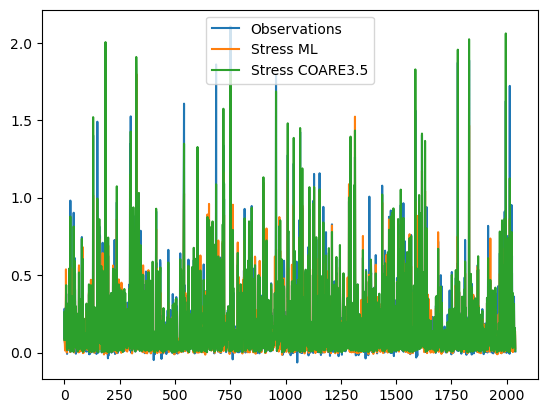

In [311]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

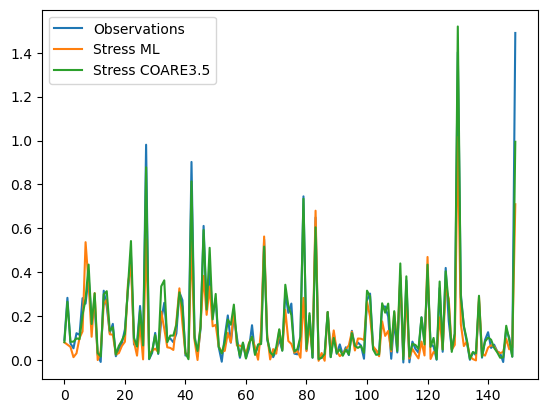

In [312]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [313]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89830179],
       [0.89830179, 1.        ]])

In [314]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

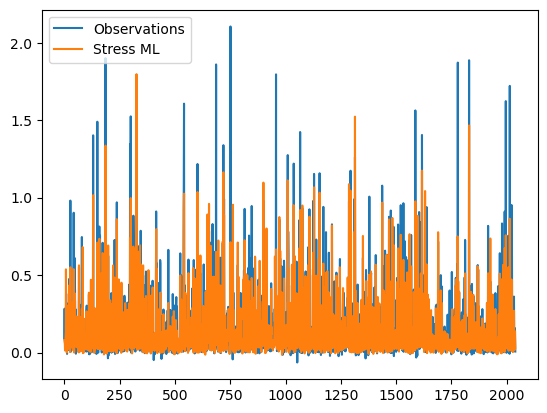

In [315]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [316]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [317]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3143342119668436

Text(0, 0.5, 'Stress ML [N/m²]')

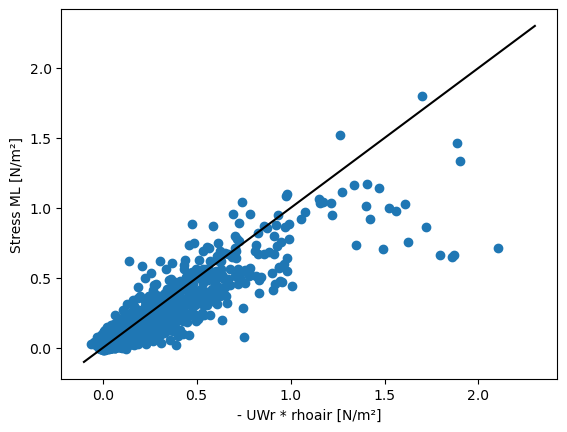

In [318]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [319]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [320]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [321]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 129ms/step - loss: 26.1770 - mean_absolute_error: 3.2134 - val_loss: 296.9560 - val_mean_absolute_error: 15.2853
Epoch 2/500
6/6 [==============================] - 1s 103ms/step - loss: 1.2324 - mean_absolute_error: 0.8838 - val_loss: 414.4763 - val_mean_absolute_error: 17.2446
Epoch 3/500
6/6 [==============================] - 1s 101ms/step - loss: 0.8254 - mean_absolute_error: 0.7127 - val_loss: 138.8830 - val_mean_absolute_error: 10.3913
Epoch 4/500
6/6 [==============================] - 1s 102ms/step - loss: 0.8034 - mean_absolute_error: 0.6963 - val_loss: 62.2295 - val_mean_absolute_error: 6.6955
Epoch 5/500
6/6 [==============================] - 1s 101ms/step - loss: 0.8085 - mean_absolute_error: 0.6729 - val_loss: 14.9538 - val_mean_absolute_error: 3.7389
Epoch 6/500
6/6 [==============================] - 1s 102ms/step - loss: 0.9547 - mean_absolute_error: 0.6698 - val_loss: 76.4984 - val_mean_absolute_error: 8.4437
Epoch 7/5

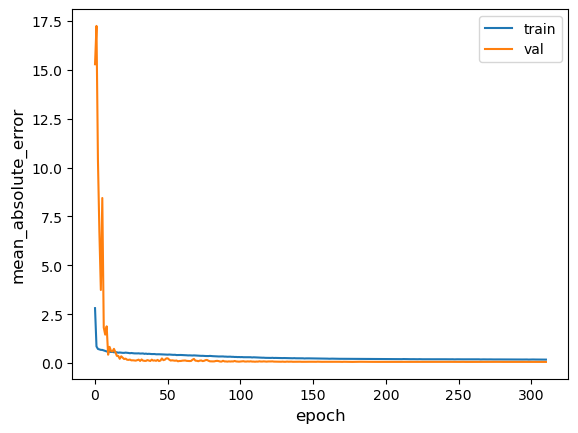

64/64 [==============================] - 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0657
Test accuracy 0.06574427336454391
Test loss 0.014749712310731411


In [322]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [323]:
y_test_pred = multi_dense_model.predict(x_test)

In [324]:
rmse(y_test.values, y_test_pred)

0.3127474008098436

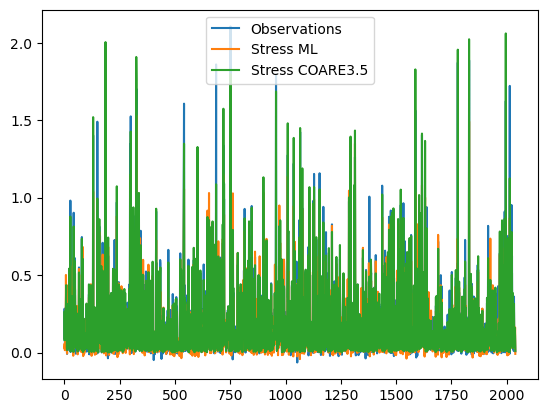

In [325]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

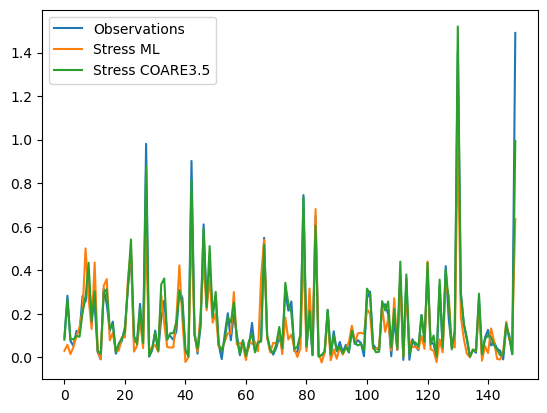

In [326]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [327]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88369554],
       [0.88369554, 1.        ]])

In [328]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

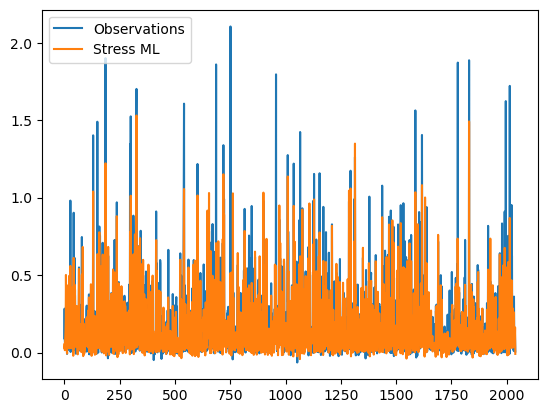

In [329]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [330]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [331]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3127474008098436

Text(0, 0.5, 'Stress ML [N/m²]')

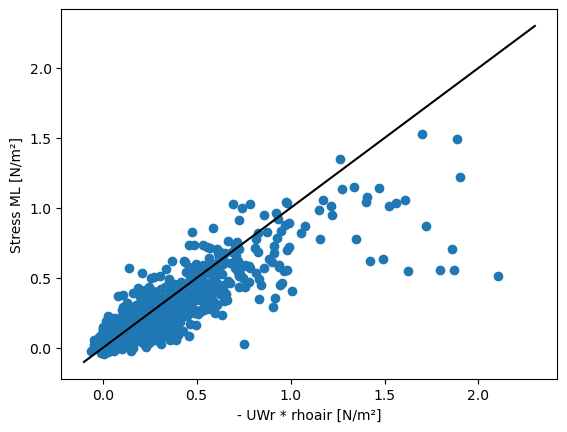

In [332]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [333]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [334]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [335]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 598ms/step - loss: 16.1239 - mean_absolute_error: 2.8578 - val_loss: 57.3566 - val_mean_absolute_error: 6.9416
Epoch 2/1000
3/3 [==============================] - 2s 533ms/step - loss: 3.4238 - mean_absolute_error: 1.4440 - val_loss: 7413.6187 - val_mean_absolute_error: 77.5716
Epoch 3/1000
3/3 [==============================] - 2s 535ms/step - loss: 1.2124 - mean_absolute_error: 0.8297 - val_loss: 8715.8623 - val_mean_absolute_error: 72.3952
Epoch 4/1000
3/3 [==============================] - 2s 543ms/step - loss: 1.0133 - mean_absolute_error: 0.7718 - val_loss: 6222.7949 - val_mean_absolute_error: 69.7220
Epoch 5/1000
3/3 [==============================] - 2s 534ms/step - loss: 0.9395 - mean_absolute_error: 0.7250 - val_loss: 2565.6206 - val_mean_absolute_error: 40.9586
Epoch 6/1000
3/3 [==============================] - 2s 560ms/step - loss: 0.9957 - mean_absolute_error: 0.7787 - val_loss: 2431.7932 - val_mean_absolute_error: 39

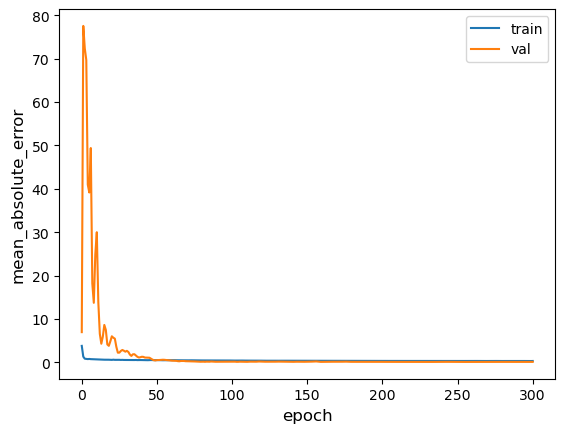

64/64 [==============================] - 2s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0871
Test accuracy 0.08711382001638412
Test loss 0.020861206576228142


In [336]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [337]:
y_test_pred = multi_dense_model.predict(x_test)

In [338]:
rmse(y_test.values, y_test_pred)

0.3119715189300622

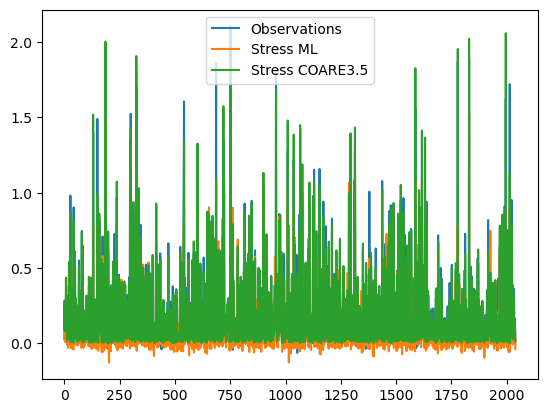

In [339]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

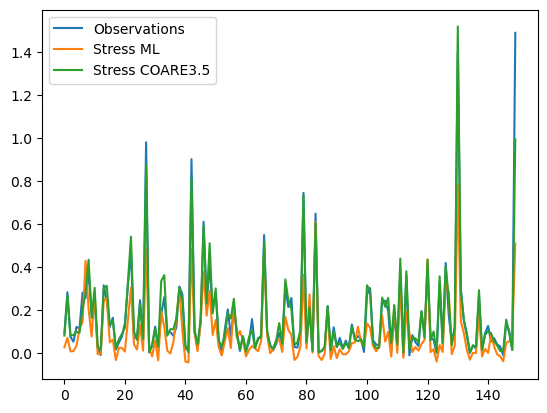

In [340]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [341]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86787909],
       [0.86787909, 1.        ]])

In [342]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

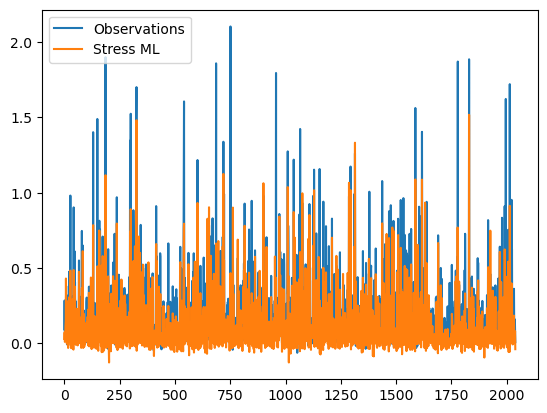

In [343]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [344]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [345]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3119715189300622

Text(0, 0.5, 'Stress ML [N/m²]')

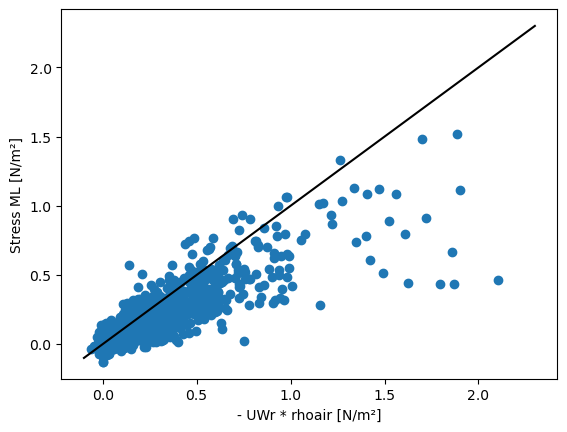

In [346]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [347]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [348]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [349]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 593ms/step - loss: 28.2647 - mean_absolute_error: 3.9958 - val_loss: 681.1820 - val_mean_absolute_error: 22.5474
Epoch 2/1000
3/3 [==============================] - 2s 531ms/step - loss: 1.8452 - mean_absolute_error: 1.0730 - val_loss: 5344.3149 - val_mean_absolute_error: 62.5969
Epoch 3/1000
3/3 [==============================] - 2s 540ms/step - loss: 1.1935 - mean_absolute_error: 0.8397 - val_loss: 9211.1846 - val_mean_absolute_error: 80.2974
Epoch 4/1000
3/3 [==============================] - 2s 526ms/step - loss: 1.0357 - mean_absolute_error: 0.7767 - val_loss: 5851.2188 - val_mean_absolute_error: 55.1810
Epoch 5/1000
3/3 [==============================] - 2s 527ms/step - loss: 0.8185 - mean_absolute_error: 0.7022 - val_loss: 3096.2664 - val_mean_absolute_error: 46.1118
Epoch 6/1000
3/3 [==============================] - 2s 530ms/step - loss: 0.9285 - mean_absolute_error: 0.7315 - val_loss: 1833.9178 - val_mean_absolute_error: 

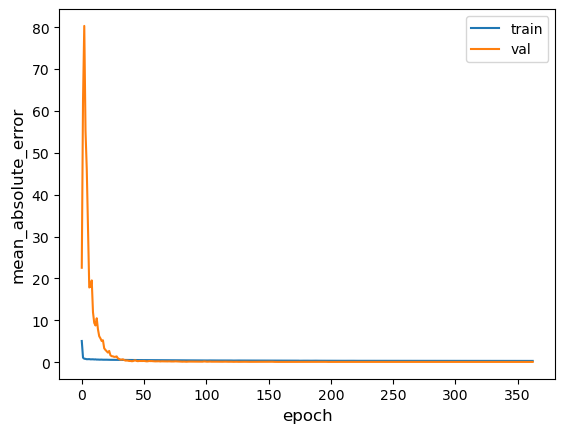

64/64 [==============================] - 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0657
Test accuracy 0.06572141498327255
Test loss 0.014529932290315628


In [350]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [351]:
y_test_pred = multi_dense_model.predict(x_test)

In [352]:
rmse(y_test.values, y_test_pred)

0.31898772364939315

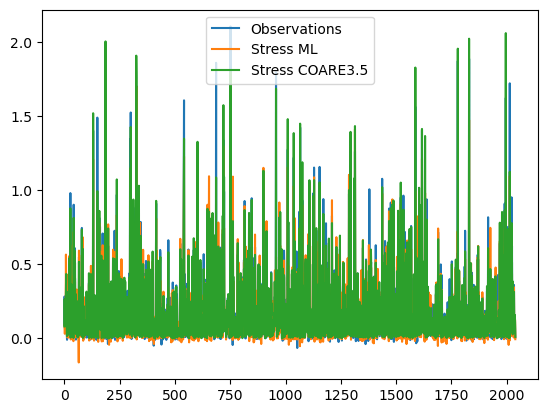

In [353]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

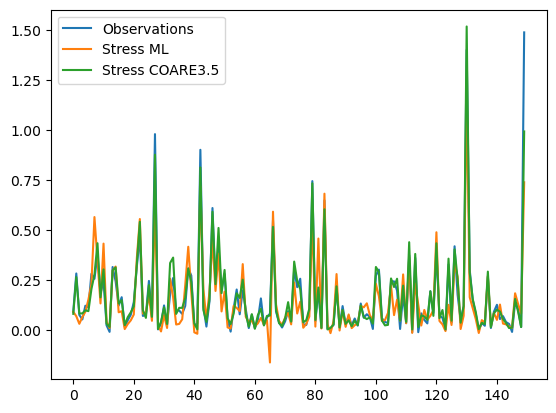

In [354]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [355]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87607807],
       [0.87607807, 1.        ]])

In [356]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

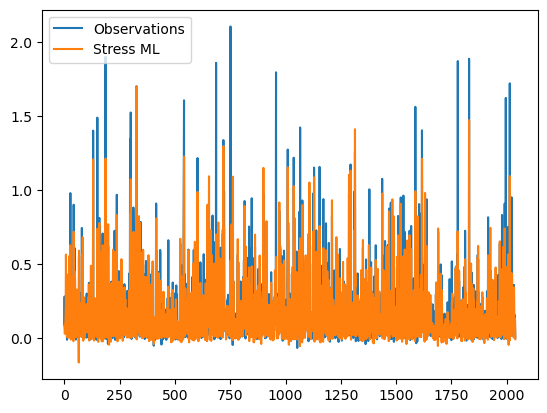

In [357]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [358]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [359]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31898772364939315

Text(0, 0.5, 'Stress ML [N/m²]')

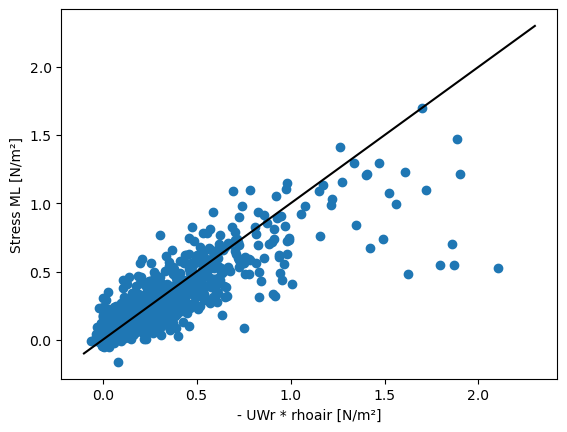

In [360]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [361]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [362]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 613ms/step - loss: 17.7820 - mean_absolute_error: 3.0362 - val_loss: 1063.6091 - val_mean_absolute_error: 30.8616
Epoch 2/1000
3/3 [==============================] - 2s 553ms/step - loss: 3.9629 - mean_absolute_error: 1.6642 - val_loss: 639.1160 - val_mean_absolute_error: 16.7353
Epoch 3/1000
3/3 [==============================] - 2s 553ms/step - loss: 1.4624 - mean_absolute_error: 0.8948 - val_loss: 328.8307 - val_mean_absolute_error: 14.3570
Epoch 4/1000
3/3 [==============================] - 2s 567ms/step - loss: 1.6940 - mean_absolute_error: 1.0454 - val_loss: 585.9110 - val_mean_absolute_error: 21.5712
Epoch 5/1000
3/3 [==============================] - 2s 560ms/step - loss: 1.1087 - mean_absolute_error: 0.8126 - val_loss: 390.7201 - val_mean_absolute_error: 17.4771
Epoch 6/1000
3/3 [==============================] - 2s 557ms/step - loss: 0.9286 - mean_absolute_error: 0.7495 - val_loss: 197.8398 - val_mean_absolute_error: 13.8

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 